### Exploring the Bay Area Housing Price Cycles Across Value Groups 
### Reza Taeb - Doctoral Candidate in Business Administration 
#### Golden Gate University, San Francisco
#### Dissertation Code

Source of Data:
https://car.sharefile.com/share/view/s0c02663a5c54e23a


<br> 

### Main Goal 

In this project, I am trying to explore the Bay Area real estate pricing cycles across value groups - recognized by counties - by utlizing some time series approaches on the available historical data of Median Single Family Houses Across the Bay Area, California. 


### Users

The users of this project and its output could vary from current property owners to prospect property investors either households or institutions. 

### Dataset 

The original dataset is captured from https://car.sharefile.com/share/view/s0c02663a5c54e23a
 
This dataset originally contains the County sales data which is generated from a survey of more than 90 associations of REALTORS® throughout the state, and represent statistics of existing single-family homes. Sample data has been refined and modified recently to increase accuracy of the statistics; The dataset has Monthly Median Price of existing single-family homes in all counties of california starting from January 1990 to January 2020. For this project, I separated the data related to the Bay Area region. S.F. Bay Area has been redefined to include the following counties: Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Solano, and Sonoma.


<br>


In [231]:
# Importing Necessary Packages and Libraries
%matplotlib inline
import pandas as pd 
import seaborn as sns
import numpy as np
import time
import re
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import datetime
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from collections import defaultdict
import ipywidgets as widgets
import sys
from ipywidgets import interact, interact_manual
sns.set()
matplotlib.rcParams['figure.dpi'] = 100

In [2]:
pwd

'/Users/rtmac/Science/Dissertation'

In [232]:
df = pd.read_csv("Data/Data-Cleaned/202001-MedianPrices-BayArea-Cleaned.csv")

In [233]:
df.head(6)

,Mon-Yr,CA,Alameda,Contra-Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma,S.F. Bay Area
0,Jan-90,194952,226149,NaN,346153,178888,287499,NaN,271840,NaN,174022,227366
1,Feb-90,196273,219306,NaN,338333,186363,300877,NaN,273100,NaN,180294,234739
2,Mar-90,194856,225162,NaN,358571,180000,290151,NaN,275500,NaN,178823,235337
3,Apr-90,196111,229333,NaN,359574,158571,288725,NaN,274660,NaN,184117,233178
4,May-90,195281,232291,NaN,374999,187692,282626,NaN,266670,NaN,185844,235881
5,Jun-90,194410,231250,NaN,394185,177332,305738,NaN,276960,NaN,185333,240386


In [234]:
df.tail(6)

,Mon-Yr,CA,Alameda,Contra-Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma,S.F. Bay Area
354,Jul-19,607990,950000,660000.0,1257000,685000,1600000,1562500.0,1298000,465000.0,655000,950000
355,Aug-19,617410,905500,672750.0,1230000,699000,1602500,1545000.0,1190000,459700.0,712000,900000
356,Sep-19,605680,910000,656000.0,1360000,787500,1540000,1470000.0,1225000,455000.0,655750,880000
357,Oct-19,605280,925000,681250.0,1397500,735000,1650000,1560000.0,1234750,470000.0,660000,940000
358,Nov-19,589770,910000,640000.0,1270000,669000,1619000,1595000.0,1259000,462980.0,650000,925000
359,Dec-19,615090,881500,665000.0,1300000,765000,1450000,1475000.0,1225000,455500.0,647500,908750


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
Mon-Yr           360 non-null object
CA               360 non-null int64
Alameda          360 non-null int64
Contra-Costa     168 non-null float64
Marin            360 non-null int64
Napa             360 non-null int64
San Francisco    360 non-null int64
San Mateo        348 non-null float64
Santa Clara      360 non-null int64
Solano           311 non-null float64
Sonoma           360 non-null int64
S.F. Bay Area    360 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 33.8+ KB


### Initial Data Wrangling 

In [236]:
print (df['San Mateo'].iloc[0])
print (type(df['Alameda'].iloc[0]))
print (df['Mon-Yr'].iloc[0])
print (type(df['Mon-Yr'].iloc[0]))

nan
<class 'numpy.int64'>
Jan-90
<class 'str'>


So we need to change the type of column ***'Mon-Yr'*** to **datetime**.

In [237]:
df['Mon-Yr']= pd.to_datetime(df['Mon-Yr'], format='%b-%y')

In [238]:
df['Mon-Yr'].head()

0   1990-01-01
1   1990-02-01
2   1990-03-01
3   1990-04-01
4   1990-05-01
Name: Mon-Yr, dtype: datetime64[ns]

In [239]:
df = df.rename(columns={"Mon-Yr": "Time", "S.F. Bay Area":"Bay Area"})

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
Time             360 non-null datetime64[ns]
CA               360 non-null int64
Alameda          360 non-null int64
Contra-Costa     168 non-null float64
Marin            360 non-null int64
Napa             360 non-null int64
San Francisco    360 non-null int64
San Mateo        348 non-null float64
Santa Clara      360 non-null int64
Solano           311 non-null float64
Sonoma           360 non-null int64
Bay Area         360 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 33.8 KB


Let's check some main stats of each counties:

In [12]:
df.describe()

,CA,Alameda,Contra-Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma,Bay Area
count,360.000000,3.600000e+02,168.000000,3.600000e+02,360.000000,3.600000e+02,3.480000e+02,3.600000e+02,311.000000,360.000000,3.600000e+02
mean,343064.225000,4.693146e+05,479310.261905,7.495341e+05,406668.466667,7.180662e+05,7.485242e+05,6.098078e+05,282439.472669,386120.005556,5.002346e+05
std,143744.348117,2.252906e+05,150761.048315,3.198139e+05,190086.782054,4.058476e+05,3.762580e+05,3.085105e+05,114455.183454,165138.311856,2.241773e+05
min,167790.000000,1.945280e+05,224620.000000,2.934780e+05,143000.000000,2.456340e+05,2.852560e+05,2.389940e+05,123182.000000,174022.000000,2.222610e+05
25%,198195.250000,2.340372e+05,317867.500000,3.838962e+05,206501.500000,2.997065e+05,4.092158e+05,3.219412e+05,187279.500000,201231.000000,2.760328e+05
50%,305494.000000,4.267065e+05,500000.000000,7.518400e+05,368516.000000,6.966725e+05,6.769000e+05,5.557220e+05,265090.000000,365481.000000,4.636880e+05
75%,477490.000000,6.587475e+05,621610.000000,9.800000e+05,599534.750000,9.225642e+05,9.121250e+05,7.885000e+05,387085.000000,531062.500000,6.903800e+05
max,617410.000000,1.025000e+06,702370.000000,1.450000e+06,787500.000000,1.762500e+06,1.770000e+06,1.454500e+06,492799.000000,712000.000000,1.050000e+06


In [241]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

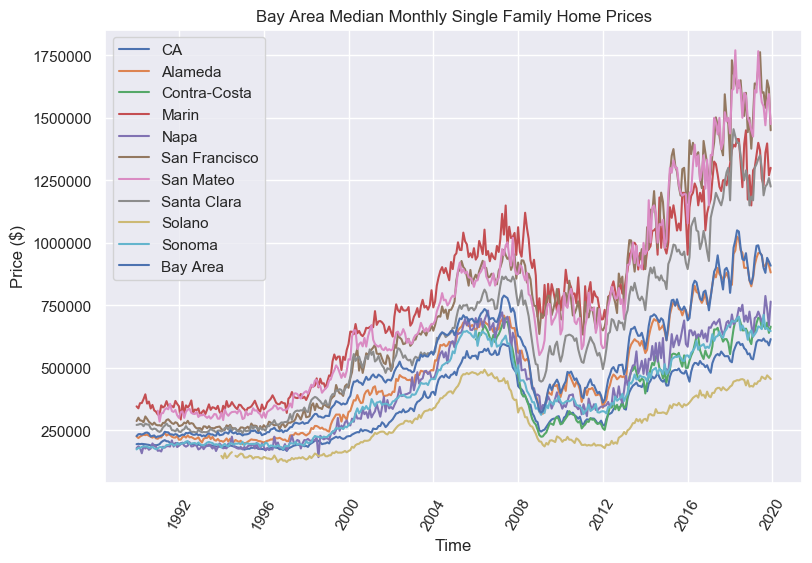

In [248]:
# Getting the whole idea [all counties]

plt.figure(figsize=(9, 6))
plt.plot(df['Time'], df.loc[:, df.columns != 'Time'])
plt.title('Bay Area Median Monthly Single Family Home Prices')
plt.ylabel('Price ($)')
plt.xlabel('Time')
#plt.xlim(('2010-01-01','2019-01-01'))
#plt.ylim((0,950000))
plt.xticks(rotation=60)
plt.legend(df.columns[1:])
plt.show()

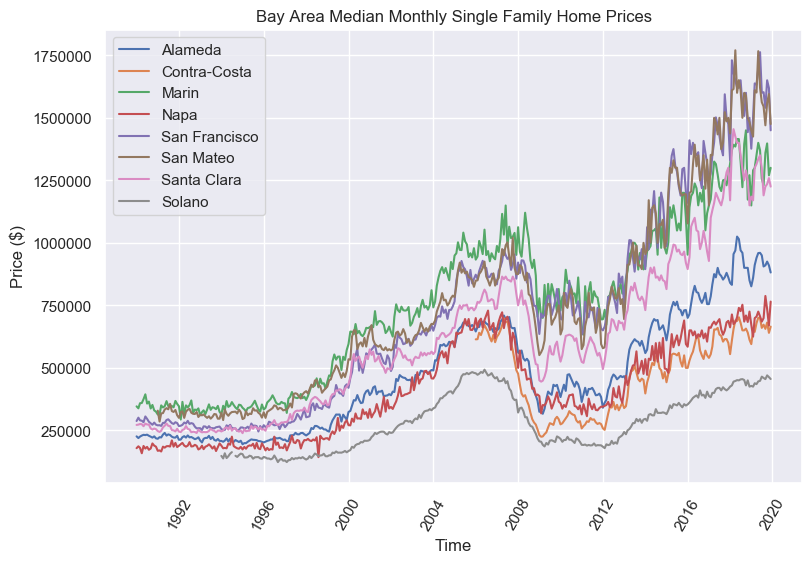

In [247]:
# Getting the whole idea [all counties]

plt.figure(figsize=(9, 6))
plt.plot(df['Time'], df.iloc[:, 2:10])
plt.title('Bay Area Median Monthly Single Family Home Prices')
plt.ylabel('Price ($)')
plt.xlabel('Time')
#plt.xlim(('2010-01-01','2019-01-01'))
#plt.ylim((0,950000))
plt.xticks(rotation=60)
plt.legend(df.columns[2:10])
plt.show()

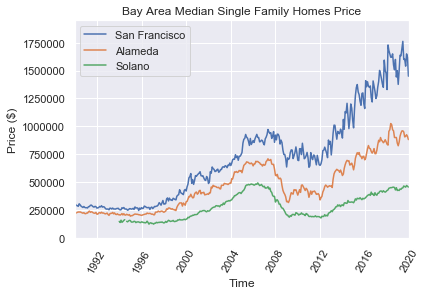

In [15]:
## Let's start visualizing three columns (San Francisco, Alameda, Solano)

plt.figure(figsize=(6, 4))
#plt.plot(df['Time'], df[['Solano','San Mateo','Bay Area','Napa','Santa Clara','San Francisco']])
plt.plot(df['Time'], df[['San Francisco','Alameda','Solano']])
plt.title('Bay Area Median Single Family Homes Price')
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.xlim(('1990-01-01','2020-01-01'))
plt.ylim((0,1950000))
plt.xticks(rotation=60)
plt.legend(['San Francisco','Alameda','Solano'])
plt.show()

Let's Zoom in:

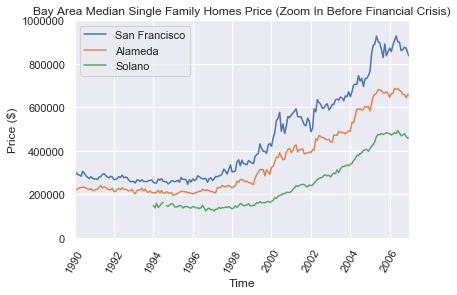

In [16]:
# 1 - Before Financial Crisis

plt.figure(figsize=(6, 4))
#plt.plot(df['Time'], df[['Solano','San Mateo','Bay Area','Napa','Santa Clara','San Francisco']])
plt.plot(df['Time'], df[['San Francisco','Alameda','Solano']])
plt.title('Bay Area Median Single Family Homes Price (Zoom In Before Financial Crisis)')
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.xlim(('1990-01-01','2007-01-01'))
plt.ylim((0,1000000))
plt.xticks(rotation=60)
plt.legend(['San Francisco','Alameda','Solano'])
plt.show()

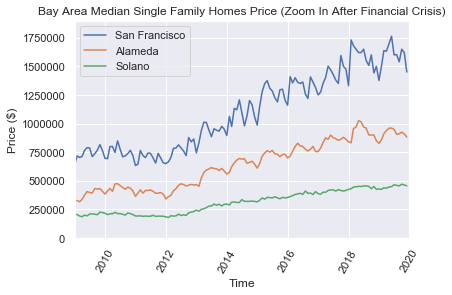

In [17]:
# 2 - After Financial Crisis

plt.figure(figsize=(6, 4))
#plt.plot(df['Time'], df[['Solano','San Mateo','Bay Area','Napa','Santa Clara','San Francisco']])
plt.plot(df['Time'], df[['San Francisco','Alameda','Solano']])
plt.title('Bay Area Median Single Family Homes Price (Zoom In After Financial Crisis)')
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.xlim(('2009-01-01','2020-01-01'))
plt.ylim((0,1900000))
plt.xticks(rotation=60)
plt.legend(['San Francisco','Alameda','Solano'])
plt.show()

# Steps in Time Series Analysis: 

- Look at the trends by doing some initial visulization
- Model drift and remove it
- Find seasonality on residuals by using Fast Fourier Transform algorithm
- Fit a seasonal model on residuals
- Add back drift and seasonality  

## Test Part on Average Bay Area

### 1 - Look at the trends by doing some basic visualization:

In [18]:
df_bay = df.loc[:,['Time','Bay Area']].copy()

In [19]:
df_bay.head()

,Time,Bay Area
0,1990-01-01,227366
1,1990-02-01,234739
2,1990-03-01,235337
3,1990-04-01,233178
4,1990-05-01,235881


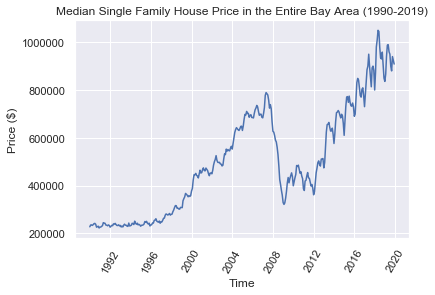

In [20]:
# Basic Visualization of the Bay Area
plt.plot(df_bay['Time'],df_bay['Bay Area'])
plt.title('Median Single Family House Price in the Entire Bay Area (1990-2019)')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.xticks(rotation=60)
plt.show()

The financial crisis had a very big impact on the real estate market, so it would be better to separate the whole time preiod into two different parts in order to get the better models. 

First, let's check where it is the best time to separate:

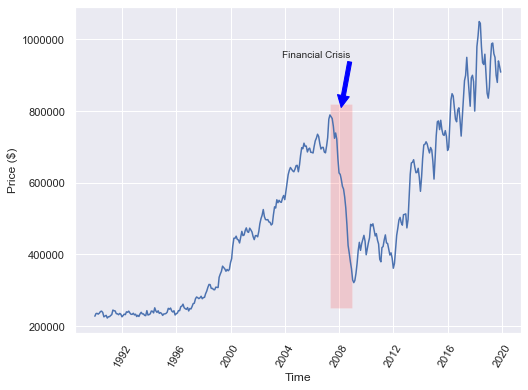

In [21]:
# first see where whould be the best place to separate (2007 to 2009 the area)
plt.figure(figsize=(8,6))
ax = sns.lineplot( x=df_bay['Time'], y=df_bay['Bay Area'])
ax.set(xlabel='Time', ylabel='Price ($)')
ax.fill_between([732800,733400], 250000, 820000, facecolor='red', alpha = .15, interpolate=True)
plt.annotate(s='Financial Crisis', xy=(733100,810000), xytext=(731500,950000), arrowprops={'color':'blue','lw':1.01})
plt.xticks(rotation=60)
plt.show()
#print (ax.get_xlim())
#print (ax.get_ylim())

More zoom in:

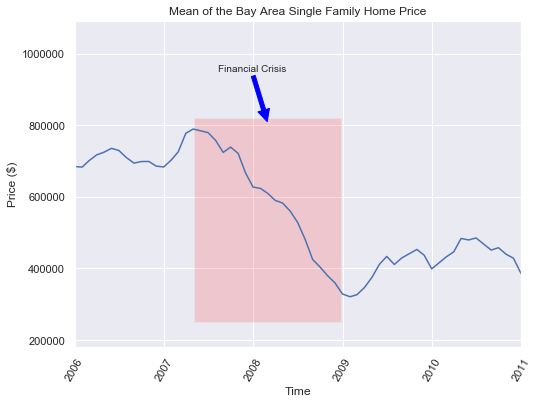

In [22]:
plt.figure(figsize=(8,6))
ax = sns.lineplot( x=df_bay['Time'], y=df_bay['Bay Area'])
ax.set(xlabel='Time', ylabel='Price ($)',title='Mean of the Bay Area Single Family Home Price')
plt.xlim('2006-01-01','2011-01-01')
ax.fill_between([732800,733400], 250000, 820000, facecolor='red', alpha = .15, interpolate=True)
plt.annotate(s='Financial Crisis', xy=(733100,810000), xytext=(732900,950000), arrowprops={'color':'blue','lw':1.01})
plt.xticks(rotation=60)
plt.show()

The financial crisis in the USA started around year 2007, and real estate also impacted significantly at this time. Modeling such crisis could be the topic of another research and needs its specfic consideration, hence I separated the real estate in two main time periods 1990 to 2007 and 2009 to 2020 and filter out the crisis data. 

In [23]:
# Separating the whole 'Bay Area' dataframe into two main parts (1990-2007) and (2009-2020)

df_bay_part1 = df_bay.loc[df_bay['Time']<'2007-01-01'].copy()
df_bay_part2 = df_bay.loc[df_bay['Time']>='2009-01-01'].copy()

In [24]:
df_bay_part1.head()

,Time,Bay Area
0,1990-01-01,227366
1,1990-02-01,234739
2,1990-03-01,235337
3,1990-04-01,233178
4,1990-05-01,235881


## Before Financial Crisis (1990 - 2007)

## 1 - Modeling Drift

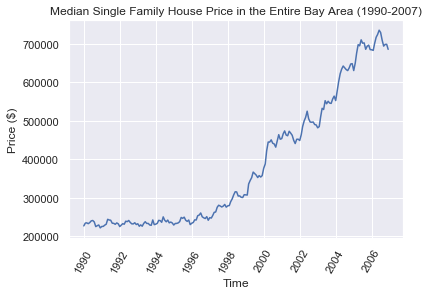

In [25]:
# Initil visualization

plt.plot(df_bay_part1['Time'],df_bay_part1['Bay Area'])
plt.title('Median Single Family House Price in the Entire Bay Area (1990-2007)')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.xticks(rotation=60)
plt.show()

The first step is modeling the **drift**. 

$$ X_t = \mu t + \varepsilon_t $$

The above chart shows that probably a version of **exponential model (** $e^{x}$ **)** can be a good choice to model the main drift. In order to do that I added the column as 'Constant', and used the Ridge regressor on logarithmic values ( $ln { x }$ ) of home price. Also, the 'Time' column should be converted to Julian type before using it as variable in our regression model. 

** Julian date is the form of Time variable which is useful for doing some mathematics operations. 

In [26]:
# Add a constant field for the linear regression
def add_constant(X):
    X['Const'] = pd.Series(np.ones(len(X.index)), index=X.index)
    return X

In [27]:
# Add Julian column + Add Constant Column
df_bay_part1['Julian'] = df_bay_part1['Time'].apply(lambda x: x.to_julian_date() )
df_bay_part1 = add_constant(df_bay_part1) 

In [28]:
# We can actually train a simple exponential model using the log(value), then train further models on the error.
exponential_model = Ridge().fit( 
    X=df_bay_part1[['Julian', 'Const']], 
    y=np.log(df_bay_part1['Bay Area'])
)

# Adding two columns as predicted value by exponential model and its error
df_bay_part1['Exponential_Model'] = np.exp(exponential_model.predict(df_bay_part1[['Julian', 'Const']]))
df_bay_part1['Error_Exponential'] = (df_bay_part1['Exponential_Model'] / df_bay_part1['Bay Area'])-1


<br>

Let's explore **Exponential Model Accuracy** :

</br>

<br>

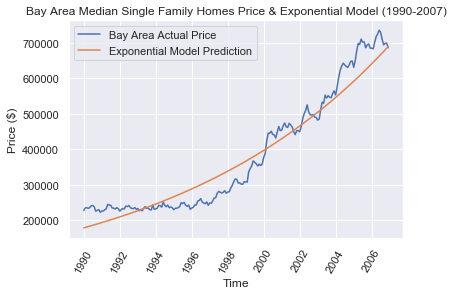

In [29]:
# exponential model visualization

plt.plot(df_bay_part1['Time'], df_bay_part1[['Bay Area','Exponential_Model']])
plt.title('Bay Area Median Single Family Homes Price & Exponential Model (1990-2007)') 
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.legend(['Bay Area Actual Price','Exponential Model Prediction'])
plt.show()

In [30]:
## visulaize this error on the figure 

df_bay_part1['Error_Exponential'].describe()

count    204.000000
mean       0.007606
std        0.124788
min       -0.234838
25%       -0.086690
50%       -0.019693
75%        0.105680
max        0.280618
Name: Error_Exponential, dtype: float64

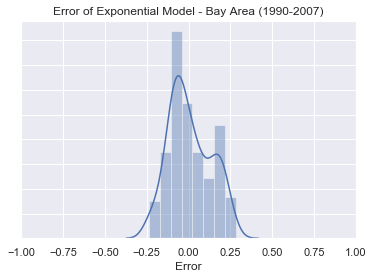

In [31]:
# Histogram of Exponential Model Error 

ax = sns.distplot(df_bay_part1['Error_Exponential'], bins=None, hist=True, kde=True)
ax.set(yticklabels=[])
plt.xlabel('Error')
plt.xlim(-1,1)
plt.title('Error of Exponential Model - Bay Area (1990-2007)')
plt.show()

## 2 - Modeling Seasonality

Let's improve our model by modeling the seasonality. We need to figure out the amplitudes and frequency of possible seasonality. In order to do that, we can use fourier analysis. 

#### Fourier Analysis

Fourier transform is a function that transforms a time domain signal into frequency domain. The function accepts a time signal as input and produces the frequency representation of the signal as an output.

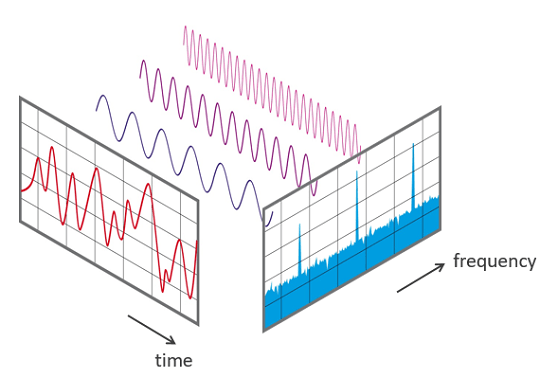

Any priodic signal can be represented as the sum of a number of sine waves with varying amplitude, phase, and frequency. A time series can be converted into its frequency components with the mathematical tool known as the Fourier transform. 

There are two main forms of priodic signals, discrete and contionous. Our case, real estate median price, is considered to be discrete signal since it is measured once in each time stamps (month) and there is no continousy between two consecutive ones. 

For $N$ uniformly sampled data points $x_j$ ($j = 0$,...,$N-1$)

$$ x_j = \frac{1}{N} \sum_{k=0}^{N-1} X_k e^{i2 \pi jk/N} $$
$$ X_k = \sum_{j=0}^{N-1} x_j e^{-i2 \pi jk/N} $$

The common algorithm for computing discrete transforms is the fast Fourier transform, usually abbreviated FFT.

The output of a FFT can be thought of as a representation of all the frequency components of your data. In some sense it is a histogram with each “frequency bin” corresponding to a particular frequency in your signal. Each frequency component has both an amplitude and phase, and is represented as a complex number. In the equations above,  𝑋𝑘
X
k
  can be thought of as the "amount" of frequency  𝑘
k
  in the signal  𝑥
x
 . Generally, we care only about the amplitude, given by the modulus of that complex term. As we are dealing with discrete data, the signal is bounded, and interpretation of the axes requires some consideration.

In order to do that, I need to remove the drift part of the data captured by exponential model. In other words, FFT algorithm will apply on the difference between **Exponential Model** and **Actual Values**.

I added the residual of data from drift (exponential model) in the new column as ***residual_exponential_model***:

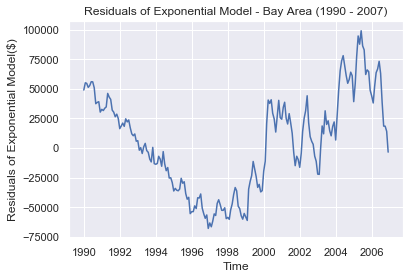

In [32]:
## Add new column as 'residual_exponential_model' and visualzie it:

df_bay_part1['Residual_Exponential_Model'] = df_bay_part1['Bay Area'] - df_bay_part1['Exponential_Model']

## Visualize the residual of the drift: 

ax = sns.lineplot(df_bay_part1['Time'],df_bay_part1['Residual_Exponential_Model'])
plt.xlabel('Time')
plt.ylabel('Residuals of Exponential Model($)')
plt.title('Residuals of Exponential Model - Bay Area (1990 - 2007)')
plt.show()

In [33]:
# Importing FFT package 
from math import pi
from scipy import fftpack

Text(0.5, 0, 'Cycles in window of the first 17 years (204 timestamps=months)')

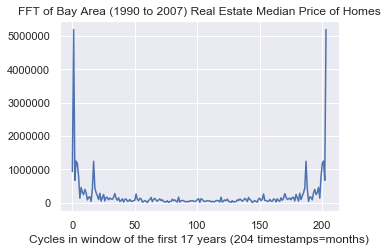

In [34]:
# Let's check the output of Fourier Transform of Bay Area median price

fft_bay_part1 = fftpack.fft(df_bay_part1['Residual_Exponential_Model'])
plt.figure(figsize=(5,3.5))
plt.plot(np.abs(fft_bay_part1))
plt.title('FFT of Bay Area (1990 to 2007) Real Estate Median Price of Homes')
plt.xlabel('Cycles in window of the first 17 years (204 timestamps=months)')

So now the main question is how to interperet the above model? 

Note that we subtract the drift before computing the FFT.  Otherwise, there would be a large zero-frequency component. (? should be right?)

The x-axis is showing frequency.  Low frequencies, corresponding to long times, are on the left; high frequencies and short times are on the right. The lowest non-zero frequency measured has a single cycle over the full 17-year period, corresponding to a frequency of $1/17\, y^{-1}$.  The highest frequency is that of the sampling, $1\, m^{-1}$.

The discrete Fourier transform of real data is symmetric about the center of its frequency range.  Due to the problem of *aliasing*, it cannot distinguish signals with a frequency above half its sampling frequency from those below.  This limiting frequency is called the **Nyquist frequency**, and the results of a FFT for frequencies above it should be ignored.

More formally, the Nyquist frequency is the highest frequency that can be resolved given your sampling rate.

$$ \nu_N = \frac{1}{2 \Delta t} $$

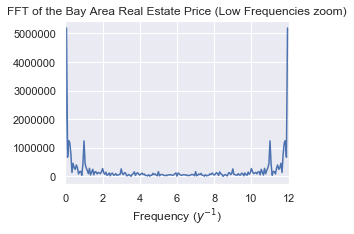

In [35]:

plt.figure(figsize = (4,3))
plt.plot(1./17*np.arange(len(fft_bay_part1)), np.abs(fft_bay_part1)) #we use np.abs(fft_bay_part) since, the fft_bay_part1 is complex
plt.title("FFT of the Bay Area Real Estate Price (Low Frequencies zoom)")
plt.xlim([0,12])
#plt.ylim([0,1900000])
plt.xlabel('Frequency ($y^{-1}$)');

Let's zoom in : 

<br>

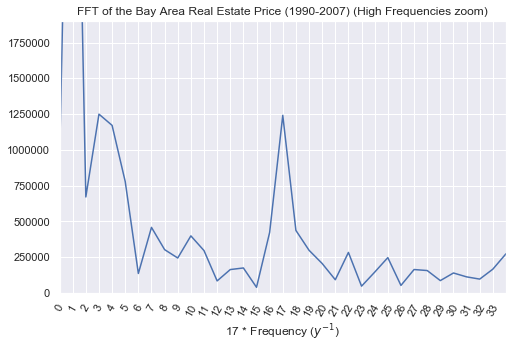

In [36]:
# Zoom in figure of FFT Bay Area (1990 - 2007)
monthly_cycles_in_18_years = 17*12

plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 2,  step=1./17),rotation=60, labels=np.arange(0,34))
plt.plot(1./17 * np.arange(len(fft_bay_part1)), np.abs(fft_bay_part1))
plt.title("FFT of the Bay Area Real Estate Price (1990-2007) (High Frequencies zoom)")
plt.ylim([0,1900000])
plt.xlim([0, 2])
plt.xlabel('17 * Frequency ($y^{-1}$)'); 

***Description of the above chart:*** 
    
Each tick point on x axis should be devided by **17** and then put it as 1/Year to get the frequency.

For example:

there is a local maximum at tick point (x = 3), so it is basically: 

**3/17 = 1/Year -> Year = 17/3 = 5.67 years**

- Now, let's find the frequencies with highest impact (amplitude of above chart) (Average Bay Area - 1990 to 2006)

In [37]:
fft_bay_part1_abs = np.abs(fft_bay_part1)
df_bay_part1_cycles = pd.DataFrame(data=fft_bay_part1_abs, columns=['FFT Absolute Value'])

In [38]:
# Based on the Nyquist frequency, we just need to check the half of the frequencies (204/2 = 102)

df_bay_part1_cycles.iloc[:102].sort_values(by='FFT Absolute Value', ascending=False).head(15)

,FFT Absolute Value
1,5.190028e+06
3,1.250165e+06
17,1.241850e+06
4,1.171624e+06
0,9.342982e+05
5,7.786890e+05
2,6.712409e+05
7,4.586022e+05
18,4.373552e+05
16,4.233335e+05


So based on the above figure and table,  I separated the top 10 periods that have relatively high FFT Absolute Value ***(indices: 1,3,17,4,0,5,2,7,18,16)***. The 0 index does not mean anything (infinite cycle). 

here are the 9 biggest periods of our **Bay Area Part 1 (1990-2007)**: 

In [39]:
d = {'Index':[1,3,17,4,5,2,7,18,16]}
df_bay_part1_cycles_top = pd.DataFrame(data=d)
df_bay_part1_cycles_top['Cycle(year)'] = df_bay_part1_cycles_top['Index'].apply(lambda x : 17./ x) 
df_bay_part1_cycles_top

,Index,Cycle(year)
0,1,17.000000
1,3,5.666667
2,17,1.000000
3,4,4.250000
4,5,3.400000
5,2,8.500000
6,7,2.428571
7,18,0.944444
8,16,1.062500


The 1 index mean the whole period (17 years), so we end up using **8 cycles** with different frequencies.

Basically, based on the above table, I assume these 8 main cycles **: 5.67 , 1 , 4.25 , 3.4 , 8.5 , 2.43 , 0.94 , 1.06  years**.

Now we want to model seasonality (using that 8 top frequencies) on the residual of exponential model.

Residual_Exp_Model = (Value - Exponential_Model) 

- Since we know that cycles are roughly sinusoidal, we know that a reasonable model for each period might be
$$ y_t = k \sin\left( \frac{t - t_0}{T} \right) + \epsilon$$
where $k$ and $t_0$ are parameters to be learned and $T$ is time of each cycle for seasonal variation.  While this is linear in $k$, it is not linear in $t_0$.  However, we know from Fourier analysis, that the above is equivalent to 
$$ y_t = A \sin\left( \frac{t}{T} \right) + B \cos\left( \frac{t}{T} \right) + \epsilon$$
which is linear in $A$ and $B$.  This can be solved using a linear regression.

Finally, we are going to add the all cycles terms as variables in our final regression model. 

In [40]:
df_bay_part1.head()

,Time,Bay Area,Julian,Const,Exponential_Model,Error_Exponential,Residual_Exponential_Model
0,1990-01-01,227366,2447892.5,1.0,178399.504602,-0.215364,48966.495398
1,1990-02-01,234739,2447923.5,1.0,179613.456151,-0.234838,55125.543849
2,1990-03-01,235337,2447951.5,1.0,180717.027083,-0.232093,54619.972917
3,1990-04-01,233178,2447982.5,1.0,181946.748631,-0.219709,51231.251369
4,1990-05-01,235881,2448012.5,1.0,183144.768480,-0.223571,52736.231520


In [41]:
# 5.67 years -> (should I change 365.25 * 5.67 since, it is night the same thing as 5.67 years)
df_bay_part1['sin(5.67years)'] = np.sin(df_bay_part1['Julian']/(365.25*5.67) * 2 * np.pi)
df_bay_part1['cos(5.67years)'] = np.cos(df_bay_part1['Julian']/(365.25*5.67) * 2 * np.pi)

# 1 year
df_bay_part1['sin(year)'] = np.sin(df_bay_part1['Julian']/(365.25*1) * 2 * np.pi)
df_bay_part1['cos(year)'] = np.cos(df_bay_part1['Julian']/(365.25*1) * 2 * np.pi)

# 4.25 years 
df_bay_part1['sin(4.25years)'] = np.sin(df_bay_part1['Julian']/(365.25*4.25) * 2 * np.pi)
df_bay_part1['cos(4.25years)'] = np.cos(df_bay_part1['Julian']/(365.25*4.25) * 2 * np.pi)

# 3.4 years 
df_bay_part1['sin(3.4years)'] = np.sin(df_bay_part1['Julian']/(365.25*3.4) * 2 * np.pi)
df_bay_part1['cos(3.4years)'] = np.cos(df_bay_part1['Julian']/(365.25*3.4) * 2 * np.pi)

# 8.5 years 
df_bay_part1['sin(8.5years)'] = np.sin(df_bay_part1['Julian']/(365.25*8.5) * 2 * np.pi)
df_bay_part1['cos(8.5years)'] = np.cos(df_bay_part1['Julian']/(365.25*8.5) * 2 * np.pi)

# 2.43 years 
df_bay_part1['sin(2.43years)'] = np.sin(df_bay_part1['Julian']/(365.25*2.43) * 2 * np.pi)
df_bay_part1['cos(2.43years)'] = np.cos(df_bay_part1['Julian']/(365.25*2.43) * 2 * np.pi)

# 0.94 years 
df_bay_part1['sin(0.94years)'] = np.sin(df_bay_part1['Julian']/(365.25*0.94) * 2 * np.pi)
df_bay_part1['cos(0.94years)'] = np.cos(df_bay_part1['Julian']/(365.25*0.94) * 2 * np.pi)

# 1.06 years 
df_bay_part1['sin(1.06years)'] = np.sin(df_bay_part1['Julian']/(365.25*1.06) * 2 * np.pi)
df_bay_part1['cos(1.06years)'] = np.cos(df_bay_part1['Julian']/(365.25*1.06) * 2 * np.pi)

let's check it very quick:

In [42]:
df_bay_part1.head(4)

,Time,Bay Area,Julian,Const,Exponential_Model,Error_Exponential,Residual_Exponential_Model,sin(5.67years),cos(5.67years),sin(year),...,sin(3.4years),cos(3.4years),sin(8.5years),cos(8.5years),sin(2.43years),cos(2.43years),sin(0.94years),cos(0.94years),sin(1.06years),cos(1.06years)
0,1990-01-01,227366,2447892.5,1.0,178399.504602,-0.215364,48966.495398,0.027044,0.999634,-0.221772,...,0.863931,0.503611,0.209545,-0.977799,0.063069,0.998009,-0.999992,-0.003957,-0.627359,-0.778730
1,1990-02-01,234739,2447923.5,1.0,179613.456151,-0.234838,55125.543849,0.120804,0.992676,0.304719,...,0.931992,0.362480,0.147827,-0.989013,0.278821,0.960343,-0.845467,0.534027,-0.925080,-0.379772
2,1990-03-01,235337,2447951.5,1.0,180717.027083,-0.232093,54619.972917,0.204595,0.978847,0.711276,...,0.973835,0.227257,0.091576,-0.995798,0.462474,0.886633,-0.475056,0.879956,-0.997898,0.064808
3,1990-04-01,233178,2447982.5,1.0,181946.748631,-0.219709,51231.251369,0.295618,0.955306,0.969843,...,0.997379,0.072351,0.028962,-0.999581,0.644400,0.764689,0.072224,0.997388,-0.843009,0.537900


The goal is prediction based on the historical data. For this purpose, I am going to **shift** the value column (Exponential_Model_Residual) to few earlier timestamps (let's do it for **2 months** in advance) and put it as the **Goal** of our predictive model. 

In [43]:
# Let's shift the data to 2 month (shift(-2)) in advance and create the new column as 'Exponential_Model_Residual_Goal'

df_bay_part1['Seasonality_Model_Goal'] = df_bay_part1['Residual_Exponential_Model'].shift(-3)

3694484420.74263
60782.270611936096


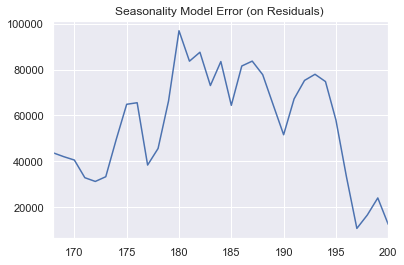

In [44]:
cut_year = 2004  # The whole dataset have monthly data from 1990 to the end of 2006
                 # So basically 3 years out of 17 years is testing dataset and 13 years is training set

train_bay_part1 = df_bay_part1[df_bay_part1.Time.dt.year < cut_year].dropna(how='any')
test_bay_part1  = df_bay_part1[df_bay_part1.Time.dt.year >= cut_year].dropna(how='any')

regress = LinearRegression().fit( 
        X=train_bay_part1[['Residual_Exponential_Model', 'sin(5.67years)', 'cos(5.67years)', 'sin(year)', 'cos(year)','sin(4.25years)','cos(4.25years)','sin(3.4years)','cos(3.4years)','sin(8.5years)','cos(8.5years)',
                           'sin(2.43years)','cos(2.43years)','sin(0.94years)','cos(0.94years)','sin(1.06years)','cos(1.06years)']], 
        y=train_bay_part1['Seasonality_Model_Goal'])

test_bay_part1['Predicted_Residual'] = regress.predict(X=test_bay_part1[['Residual_Exponential_Model', 'sin(5.67years)', 'cos(5.67years)', 'sin(year)', 'cos(year)','sin(4.25years)','cos(4.25years)','sin(3.4years)','cos(3.4years)','sin(8.5years)','cos(8.5years)',
                           'sin(2.43years)','cos(2.43years)','sin(0.94years)','cos(0.94years)','sin(1.06years)','cos(1.06years)']])

(test_bay_part1['Seasonality_Model_Goal'] - test_bay_part1['Predicted_Residual']).plot()
plt.title('Seasonality Model Error (on Residuals) ')
print(mean_squared_error(test_bay_part1['Seasonality_Model_Goal'], test_bay_part1['Predicted_Residual']))
print (np.sqrt(mean_squared_error(test_bay_part1['Seasonality_Model_Goal'], test_bay_part1['Predicted_Residual'])))

## 3 - Adding Back Drift and Seasonality

Now let's put back drift and seasonality to compare the models with real data.

#### Example : 
    
For point 3 -> **Predicted value = exponential_model point 3 + seasonality_model (on residuals) of point 1** 

So the predicted residuals should be shifted (2 month forward (.shift(2)) 

In [45]:
test_bay_part1['Shifted_Back_Predicted_Residual'] = test_bay_part1['Predicted_Residual'].shift(3)
test_bay_part1['Final_Predicted_Value'] = test_bay_part1['Bay Area'] + test_bay_part1['Shifted_Back_Predicted_Residual']
test_bay_part1['Error_Final'] = (test_bay_part1['Final_Predicted_Value'] / test_bay_part1['Bay Area'])-1

Let's check some columns:

In [46]:
test_bay_part1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 168 to 200
Data columns (total 28 columns):
Time                               33 non-null datetime64[ns]
Bay Area                           33 non-null int64
Julian                             33 non-null float64
Const                              33 non-null float64
Exponential_Model                  33 non-null float64
Error_Exponential                  33 non-null float64
Residual_Exponential_Model         33 non-null float64
sin(5.67years)                     33 non-null float64
cos(5.67years)                     33 non-null float64
sin(year)                          33 non-null float64
cos(year)                          33 non-null float64
sin(4.25years)                     33 non-null float64
cos(4.25years)                     33 non-null float64
sin(3.4years)                      33 non-null float64
cos(3.4years)                      33 non-null float64
sin(8.5years)                      33 non-null float64
cos(8.5ye

In [47]:
test_bay_part1[['Time','Bay Area','Exponential_Model','Residual_Exponential_Model','Error_Exponential','Final_Predicted_Value','Error_Final']]

,Time,Bay Area,Exponential_Model,Residual_Exponential_Model,Error_Exponential,Final_Predicted_Value,Error_Final
168,2004-01-01,552699,545966.334274,6732.665726,-0.012181,NaN,NaN
169,2004-02-01,577193,549681.460496,27511.539504,-0.047664,NaN,NaN
170,2004-03-01,601622,553179.784193,48442.215807,-0.080519,NaN,NaN
171,2004-04-01,622219,556943.995633,65275.004367,-0.104907,643775.392753,0.034644
172,2004-05-01,634295,560611.167298,73683.832702,-0.116167,665915.891841,0.049852
173,2004-06-01,642459,564425.946922,78033.053078,-0.121460,679873.882822,0.058237
174,2004-07-01,637812,568142.383145,69669.616855,-0.109232,674543.192431,0.057589
175,2004-08-01,633234,572008.410284,61225.589716,-0.096687,663152.103646,0.047247
176,2004-09-01,630555,575900.744500,54654.255500,-0.086676,651848.777886,0.033770
177,2004-10-01,637546,579692.735990,57853.264010,-0.090744,645827.265037,0.012989


In [48]:
print ('The mean and median error of Exponential Model: {} , {}'.format(np.mean(test_bay_part1['Error_Exponential']),np.median(test_bay_part1['Error_Exponential'])))
print ('The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): {} , {}'.format(np.mean(test_bay_part1['Error_Final']),np.nanmedian(test_bay_part1['Error_Final'])))

The mean and median error of Exponential Model: -0.08946447025610385 , -0.09212380953152943
The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): 0.005907876964214994 , 0.0035016650244514835


let's compare the predicted values with real values:

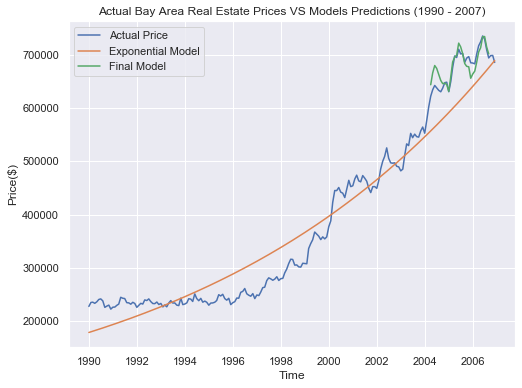

In [49]:
plt.figure(figsize=(8, 6))
plt.plot(df_bay_part1['Time'],df_bay_part1['Bay Area'])
plt.plot(df_bay_part1['Time'],df_bay_part1['Exponential_Model'])
plt.plot(test_bay_part1['Time'],test_bay_part1['Final_Predicted_Value'])
plt.legend(['Actual Price','Exponential Model','Final Model'])
plt.title('Actual Bay Area Real Estate Prices VS Models Predictions (1990 - 2007)')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.show()


In [50]:
test_bay_part1['Error_Final'].describe()

count    30.000000
mean      0.005908
std       0.026007
min      -0.042390
25%      -0.013307
50%       0.003502
75%       0.016076
max       0.058237
Name: Error_Final, dtype: float64

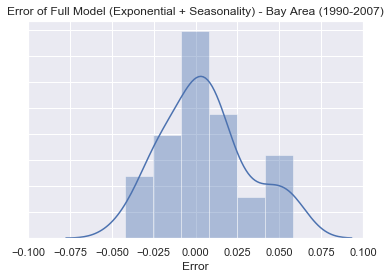

In [51]:
# Histogram of Exponential Model Error 

ax = sns.distplot(test_bay_part1['Error_Final'].dropna(), bins=None, hist=True, kde=True)
ax.set(yticklabels=[])
plt.xlabel('Error')
plt.xlim(-0.1,0.1)
plt.title('Error of Full Model (Exponential + Seasonality) - Bay Area (1990-2007)')
plt.show()

# After Financial Crisis (2009 - 2020)

## 1 - Modeling Drift

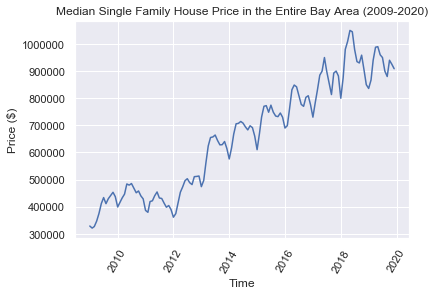

In [52]:
# Initil visualization

plt.plot(df_bay_part2['Time'],df_bay_part2['Bay Area'])
plt.title('Median Single Family House Price in the Entire Bay Area (2009-2020)')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.xticks(rotation=60)
plt.show()

In [53]:
# Add Julian column + Add Constant Column
df_bay_part2['Julian'] = df_bay_part2['Time'].apply(lambda x: x.to_julian_date() )
df_bay_part2 = add_constant(df_bay_part2) 

In [54]:
# We can actually train a simple exponential model using the log(value), then train further models on the error.
exponential_model = Ridge().fit( 
    X=df_bay_part2[['Julian', 'Const']], 
    y=np.log(df_bay_part2['Bay Area'])
)

#exp_model_df_bay = df_bay_part1

# Adding two columns as predicted value by exponential model and its error
df_bay_part2['Exponential_Model'] = np.exp(exponential_model.predict(df_bay_part2[['Julian', 'Const']]))
df_bay_part2['Error_Exponential'] = (df_bay_part2['Exponential_Model'] / df_bay_part2['Bay Area'])-1

<br>

Let's explore the **Exponential Model Accuracy:**

<br>

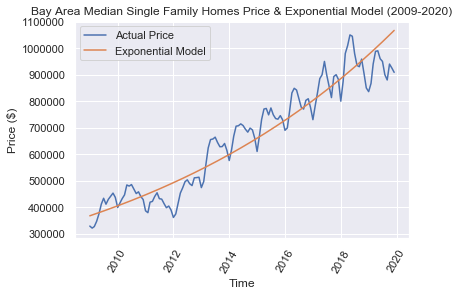

In [55]:
# exponential model visualization

plt.plot(df_bay_part2['Time'], df_bay_part2[['Bay Area','Exponential_Model']])
plt.title('Bay Area Median Single Family Homes Price & Exponential Model (2009-2020)') 
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.legend(['Actual Price','Exponential Model'])
plt.show()

In [56]:
## visulaize this error on the figure 

df_bay_part2['Error_Exponential'].describe()

count    132.000000
mean       0.005163
std        0.104420
min       -0.143994
25%       -0.080214
50%       -0.008399
75%        0.076353
max        0.363070
Name: Error_Exponential, dtype: float64

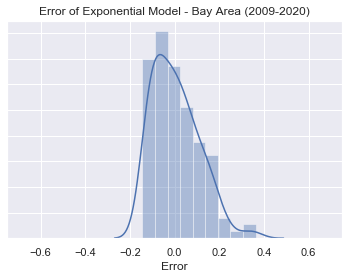

In [57]:
# Histogram of Exponential Model Error 

ax = sns.distplot(df_bay_part2['Error_Exponential'], bins=None, hist=True, kde=True)
ax.set(yticklabels=[])
plt.xlabel('Error')
plt.xlim(-0.75,0.75)
plt.title('Error of Exponential Model - Bay Area (2009-2020)')
plt.show()

## 2 - Modeling Seasonality

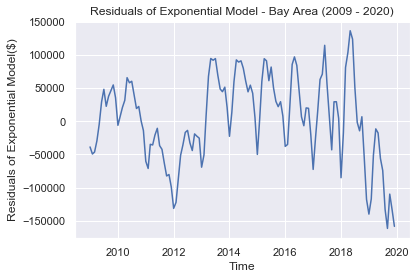

In [58]:
## Add new column as 'residual_exponential_model' and visualzie it:

df_bay_part2['Residual_Exponential_Model'] = df_bay_part2['Bay Area'] - df_bay_part2['Exponential_Model']

## Visualize the residual of the drift: 

ax = sns.lineplot(df_bay_part2['Time'],df_bay_part2['Residual_Exponential_Model'])
plt.xlabel('Time')
plt.ylabel('Residuals of Exponential Model($)')
plt.title('Residuals of Exponential Model - Bay Area (2009 - 2020)')
plt.show()

Text(0.5, 0, 'Cycles in window of the first 11 years (132 timestamps=months)')

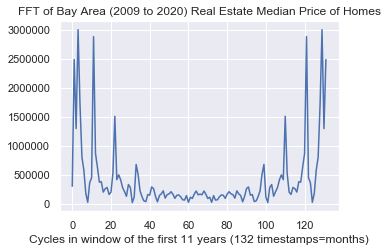

In [59]:
# Let's check the output of Fourier Transform of Bay Area median price

fft_bay_part2 = fftpack.fft(df_bay_part2['Residual_Exponential_Model'])
plt.figure(figsize=(5,3.5))
plt.plot(np.abs(fft_bay_part2))
plt.title('FFT of Bay Area (2009 to 2020) Real Estate Median Price of Homes')
plt.xlabel('Cycles in window of the first 11 years (132 timestamps=months)')

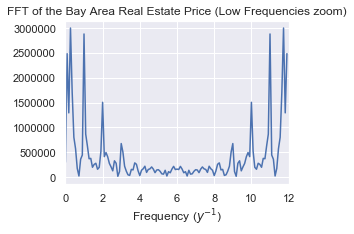

In [60]:

plt.figure(figsize = (4,3))
plt.plot(1./11*np.arange(len(fft_bay_part2)), np.abs(fft_bay_part2)) #we use np.abs(fft_bay_part) since, the fft_bay_part1 is complex
plt.title("FFT of the Bay Area Real Estate Price (Low Frequencies zoom)")
plt.xlim([0,12])
#plt.ylim([0,1900000])
plt.xlabel('Frequency ($y^{-1}$)');

<br>

Let's zoom in: 

<br>

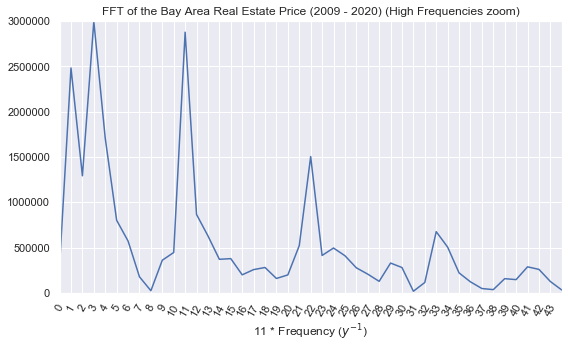

In [61]:
# Zoom in figure of FFT Bay Area (2009 - 2020)
monthly_cycles_in_11_years = 11*12

plt.figure(figsize=(9, 5))
plt.xticks(np.arange(0, 4,  step=1./11),rotation=60, labels=np.arange(0,44))
plt.plot(1./11 * np.arange(len(fft_bay_part2)), np.abs(fft_bay_part2))
plt.title("FFT of the Bay Area Real Estate Price (2009 - 2020) (High Frequencies zoom)")
plt.ylim([0,3000000])
plt.xlim([0, 4])
plt.xlabel('11 * Frequency ($y^{-1}$)'); 

***Description of the above chart:*** 
    
Each tick point on x axis should be devided by **11** and then put it as 1/Year to get the frequency.

For example:

there is a local maximum at tick point (x = 3), so it is basically: 

**3/11 = 1/Year -> Year = 11/3 = 3.67 years**

- Now, let's find the frequencies with highest impact (amplitude of above chart) (Average Bay Area - 2009 to 2020)

In [62]:
fft_bay_part2_abs = np.abs(fft_bay_part2)

In [63]:
df_bay_part2_cycles = pd.DataFrame(data=fft_bay_part2_abs, columns=['FFT Absolute Value'])

In [64]:
# Based on the Nyquist frequency, we just need to check the half of the frequencies (132/2 = 66)

df_bay_part2_cycles.iloc[:66].sort_values(by='FFT Absolute Value', ascending=False).head(15)

,FFT Absolute Value
3,2.997804e+06
11,2.878392e+06
1,2.483545e+06
4,1.708582e+06
22,1.505768e+06
2,1.293469e+06
12,8.667937e+05
5,8.026977e+05
33,6.769094e+05
13,6.300679e+05


So based on the above figure and table,  I separated the top 8 periods that have relatively high FFT Absolute Value ***(indices: 3,11,1,4,22,2,12,5)***. 

here are the 8 biggest periods of our **Bay Area Part 2 (2009 - 2020)**: 

In [65]:
d = {'Index':[3,11,1,4,22,2,12,5]}
df_bay_part2_cycles_top = pd.DataFrame(data=d)
df_bay_part2_cycles_top['Cycle(year)'] = df_bay_part2_cycles_top['Index'].apply(lambda x : 11./ x) 
df_bay_part2_cycles_top

,Index,Cycle(year)
0,3,3.666667
1,11,1.000000
2,1,11.000000
3,4,2.750000
4,22,0.500000
5,2,5.500000
6,12,0.916667
7,5,2.200000


The 1 index means the whole period (11 years), so we end up using **7 cycles** with different frequencies.

Basically, based on the above table, I assume these 8 main cycles **: 3.67 , 1 , 2.75 , 0.5 , 5.5 , 0.91 , 2.2 years**.

In [66]:
df_bay_part2.head()

,Time,Bay Area,Julian,Const,Exponential_Model,Error_Exponential,Residual_Exponential_Model
228,2009-01-01,328680,2454832.5,1.0,367432.337426,0.117903,-38752.337426
229,2009-02-01,321110,2454863.5,1.0,370491.316921,0.153783,-49381.316921
230,2009-03-01,326840,2454891.5,1.0,373276.149605,0.142076,-46436.149605
231,2009-04-01,346940,2454922.5,1.0,376383.780512,0.084867,-29443.780512
232,2009-05-01,374800,2454952.5,1.0,379415.796571,0.012315,-4615.796571


In [67]:
# 3.67 years -> (should I change 365.25 * 3.67 since, it is night the same thing as 3.67 years)
df_bay_part2['sin(3.67years)'] = np.sin(df_bay_part2['Julian']/(365.25*3.67) * 2 * np.pi)
df_bay_part2['cos(3.67years)'] = np.cos(df_bay_part2['Julian']/(365.25*3.67) * 2 * np.pi)

# 1 year
df_bay_part2['sin(year)'] = np.sin(df_bay_part2['Julian']/(365.25*1) * 2 * np.pi)
df_bay_part2['cos(year)'] = np.cos(df_bay_part2['Julian']/(365.25*1) * 2 * np.pi)

# 2.75 years 
df_bay_part2['sin(2.75years)'] = np.sin(df_bay_part2['Julian']/(365.25*2.75) * 2 * np.pi)
df_bay_part2['cos(2.75years)'] = np.cos(df_bay_part2['Julian']/(365.25*2.75) * 2 * np.pi)

# 0.5 years 
df_bay_part2['sin(0.5years)'] = np.sin(df_bay_part2['Julian']/(365.25*0.5) * 2 * np.pi)
df_bay_part2['cos(0.5years)'] = np.cos(df_bay_part2['Julian']/(365.25*0.5) * 2 * np.pi)

# 5.5 years 
df_bay_part2['sin(5.5years)'] = np.sin(df_bay_part2['Julian']/(365.25*5.5) * 2 * np.pi)
df_bay_part2['cos(5.5years)'] = np.cos(df_bay_part2['Julian']/(365.25*5.5) * 2 * np.pi)

# 0.91 years 
df_bay_part2['sin(0.91years)'] = np.sin(df_bay_part2['Julian']/(365.25*0.91) * 2 * np.pi)
df_bay_part2['cos(0.91years)'] = np.cos(df_bay_part2['Julian']/(365.25*0.91) * 2 * np.pi)

# 2.5 years 
df_bay_part2['sin(2.5years)'] = np.sin(df_bay_part2['Julian']/(365.25*2.5) * 2 * np.pi)
df_bay_part2['cos(2.5years)'] = np.cos(df_bay_part2['Julian']/(365.25*2.5) * 2 * np.pi)

let's check it very quick:

In [68]:
df_bay_part2.head(4)

,Time,Bay Area,Julian,Const,Exponential_Model,Error_Exponential,Residual_Exponential_Model,sin(3.67years),cos(3.67years),sin(year),...,sin(2.75years),cos(2.75years),sin(0.5years),cos(0.5years),sin(5.5years),cos(5.5years),sin(0.91years),cos(0.91years),sin(2.5years),cos(2.5years)
228,2009-01-01,328680,2454832.5,1.0,367432.337426,0.117903,-38752.337426,0.889179,-0.457560,-0.217577,...,-0.079672,0.996821,-0.424728,0.905321,-0.039868,0.999205,-0.893632,-0.448800,0.656411,-0.754404
229,2009-02-01,321110,2454863.5,1.0,370491.316921,0.153783,-49381.316921,0.813555,-0.581487,0.308812,...,0.113914,0.993491,0.587437,0.809270,0.057050,0.998371,-0.992737,0.120302,0.481829,-0.876265
230,2009-03-01,326840,2454891.5,1.0,373276.149605,0.142076,-46436.149605,0.730460,-0.682955,0.714292,...,0.285294,0.958440,0.999791,-0.020426,0.144153,0.989555,-0.796145,0.605106,0.305129,-0.952311
231,2009-04-01,346940,2454922.5,1.0,376383.780512,0.084867,-29443.780512,0.623874,-0.781525,0.970882,...,0.464643,0.885498,0.465162,-0.885225,0.239272,0.970953,-0.328656,0.944450,0.096613,-0.995322


The goal is prediction based on the historical data. For this purpose, I am going to **shift** the value column (Exponential_Model_Residual) to few earlier timestamps (let's do it for **2 months** in advance) and put it as the **Goal** of our predictive model. 

In [69]:
# Let's shift the data to 2 month (shift(-2)) in advance and create the new column as 'Exponential_Model_Residual_Goal'

df_bay_part2['Seasonality_Model_Goal'] = df_bay_part2['Residual_Exponential_Model'].shift(-3)

5957161725.846576
77182.65171556738


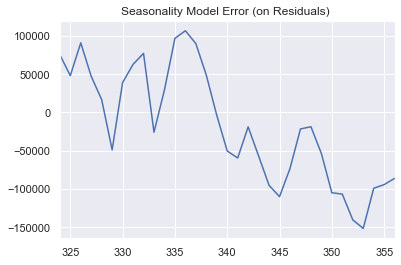

In [70]:
cut_year = 2017  # The whole dataset have monthly data from 2009 to the end of 2019
                 # So basically 3 years out of 11 years is testing dataset and 8 years is training set

train_bay_part2 = df_bay_part2[df_bay_part2.Time.dt.year < cut_year].dropna(how='any')
test_bay_part2  = df_bay_part2[df_bay_part2.Time.dt.year >= cut_year].dropna(how='any')

regress = LinearRegression().fit( 
        X=train_bay_part2[['Residual_Exponential_Model', 'sin(3.67years)', 'cos(3.67years)', 'sin(year)', 'cos(year)','sin(2.75years)','cos(2.75years)','sin(0.5years)','cos(0.5years)','sin(5.5years)','cos(5.5years)']],
                           #,'sin(0.91years)','cos(0.91years)','sin(2.5years)','cos(2.5years)']], 
        y=train_bay_part2['Seasonality_Model_Goal'])

test_bay_part2['Predicted_Residual'] = regress.predict(X=test_bay_part2[['Residual_Exponential_Model', 'sin(3.67years)', 'cos(3.67years)', 'sin(year)', 'cos(year)','sin(2.75years)','cos(2.75years)','sin(0.5years)','cos(0.5years)','sin(5.5years)','cos(5.5years)']])
                           #,'sin(0.91years)','cos(0.91years)','sin(2.5years)','cos(2.5years)']])

(test_bay_part2['Seasonality_Model_Goal'] - test_bay_part2['Predicted_Residual']).plot()
plt.title('Seasonality Model Error (on Residuals) ')
print(mean_squared_error(test_bay_part2['Seasonality_Model_Goal'], test_bay_part2['Predicted_Residual']))
print (np.sqrt(mean_squared_error(test_bay_part2['Seasonality_Model_Goal'], test_bay_part2['Predicted_Residual'])))

## 3 - Adding Back Drift and Seasonality

Now let's put back drift and seasonality to compare the models with real data.

#### Example : 
    
For point 3 -> **Predicted value = exponential_model point 3 + seasonality_model (on residuals) of point 1** 

So the predicted residuals should be shifted (2 month forward (.shift(2)) 

In [71]:
test_bay_part2['Shifted_Back_Predicted_Residual'] = test_bay_part2['Predicted_Residual'].shift(3)

In [72]:
test_bay_part2['Final_Predicted_Value'] = test_bay_part2['Bay Area'] + test_bay_part2['Shifted_Back_Predicted_Residual']

In [73]:
test_bay_part2['Error_Final'] = (test_bay_part2['Final_Predicted_Value'] / test_bay_part2['Bay Area'])-1

Let's check some columns:

In [74]:
test_bay_part2[['Time','Bay Area','Exponential_Model','Residual_Exponential_Model','Error_Exponential','Final_Predicted_Value','Error_Final']]

,Time,Bay Area,Exponential_Model,Residual_Exponential_Model,Error_Exponential,Final_Predicted_Value,Error_Final
324,2017-01-01,730200,8.027281e+05,-72528.113193,0.099326,NaN,NaN
325,2017-02-01,784470,8.094111e+05,-24941.054754,0.031794,NaN,NaN
326,2017-03-01,830000,8.154951e+05,14504.931243,-0.017476,NaN,NaN
327,2017-04-01,885000,8.222843e+05,62715.701118,-0.070865,8.720671e+05,-0.014613
328,2017-05-01,899730,8.289083e+05,70821.666479,-0.078714,9.224246e+05,0.025224
329,2017-06-01,950000,8.358092e+05,114190.767082,-0.120201,9.731383e+05,0.024356
330,2017-07-01,898880,8.425422e+05,56337.780306,-0.062676,9.079331e+05,0.010072
331,2017-08-01,856200,8.495566e+05,6643.374899,-0.007759,8.460179e+05,-0.011892
332,2017-09-01,813520,8.566294e+05,-43109.427442,0.052991,8.192260e+05,0.007014
333,2017-10-01,892720,8.635301e+05,29189.865579,-0.032698,8.828327e+05,-0.011075


In [75]:
print ('The mean and median error of Exponential Model: {} , {}'.format(np.mean(test_bay_part2['Error_Exponential']),np.median(test_bay_part2['Error_Exponential'])))
print ('The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): {} , {}'.format(np.mean(test_bay_part2['Error_Final']),np.nanmedian(test_bay_part2['Error_Final'])))

The mean and median error of Exponential Model: 0.013962477826196511 , 0.01170699412337739
The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): 0.0014393640776813451 , 0.0045355985416351


let's compare the predicted values with real values:

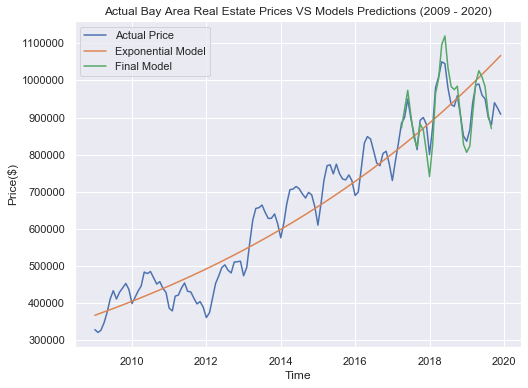

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(df_bay_part2['Time'],df_bay_part2['Bay Area'])
plt.plot(df_bay_part2['Time'],df_bay_part2['Exponential_Model'])
plt.plot(test_bay_part2['Time'],test_bay_part2['Final_Predicted_Value'])
plt.legend(['Actual Price','Exponential Model','Final Model'])
plt.title('Actual Bay Area Real Estate Prices VS Models Predictions (2009 - 2020)')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.show()

In [77]:
## visulaize this error on the figure 

test_bay_part2['Error_Final'].describe()

count    30.000000
mean      0.001439
std       0.039587
min      -0.082798
25%      -0.023942
50%       0.004536
75%       0.032342
max       0.071378
Name: Error_Final, dtype: float64

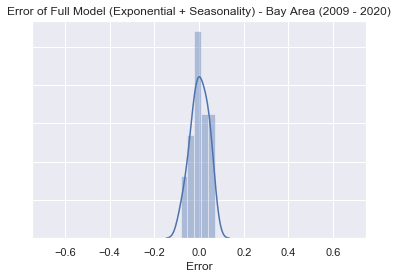

In [78]:
# Histogram of Exponential Model Error 

ax = sns.distplot(test_bay_part2['Error_Final'].dropna(), bins=None, hist=True, kde=True)
ax.set(yticklabels=[])
plt.xlabel('Error')
plt.xlim(-0.75,0.75)
plt.title('Error of Full Model (Exponential + Seasonality) - Bay Area (2009 - 2020)')
plt.show()

# Check the Model Across Value Groups

Now that we found the process, let's see how the model and cycles work across value groups:

First, let's find and group the counties with similar prices.

In [79]:
df[['Alameda','Contra-Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']].describe()

,Alameda,Contra-Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
count,3.600000e+02,168.000000,3.600000e+02,360.000000,3.600000e+02,3.480000e+02,3.600000e+02,311.000000,360.000000
mean,4.693146e+05,479310.261905,7.495341e+05,406668.466667,7.180662e+05,7.485242e+05,6.098078e+05,282439.472669,386120.005556
std,2.252906e+05,150761.048315,3.198139e+05,190086.782054,4.058476e+05,3.762580e+05,3.085105e+05,114455.183454,165138.311856
min,1.945280e+05,224620.000000,2.934780e+05,143000.000000,2.456340e+05,2.852560e+05,2.389940e+05,123182.000000,174022.000000
25%,2.340372e+05,317867.500000,3.838962e+05,206501.500000,2.997065e+05,4.092158e+05,3.219412e+05,187279.500000,201231.000000
50%,4.267065e+05,500000.000000,7.518400e+05,368516.000000,6.966725e+05,6.769000e+05,5.557220e+05,265090.000000,365481.000000
75%,6.587475e+05,621610.000000,9.800000e+05,599534.750000,9.225642e+05,9.121250e+05,7.885000e+05,387085.000000,531062.500000
max,1.025000e+06,702370.000000,1.450000e+06,787500.000000,1.762500e+06,1.770000e+06,1.454500e+06,492799.000000,712000.000000


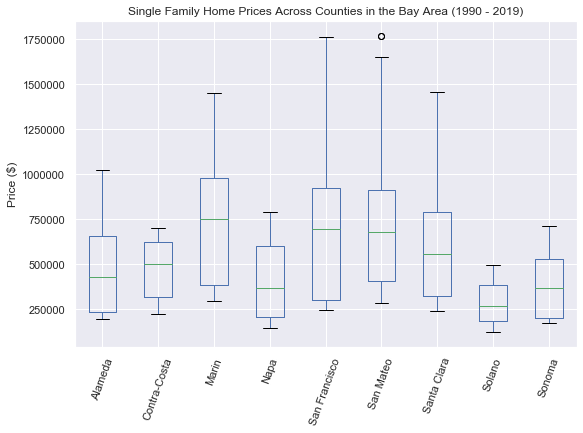

In [80]:

plt.figure(figsize=(9,6))
df[['Alameda','Contra-Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']].boxplot()
plt.xticks(rotation=70)
plt.ylabel('Price ($)')
plt.title('Single Family Home Prices Across Counties in the Bay Area (1990 - 2019)')
plt.show()


Since we are going to check the cycles before and after the financial crisis separately, let's check their distribution also separately:

In [81]:
cut_year_1 = 2007
cut_year_2 = 2009 
df_bfr_crisis = df[df['Time'].dt.year < cut_year_1 ].dropna(how='any')
df_aft_crisis = df[df['Time'].dt.year >= cut_year_2 ].dropna(how='any')

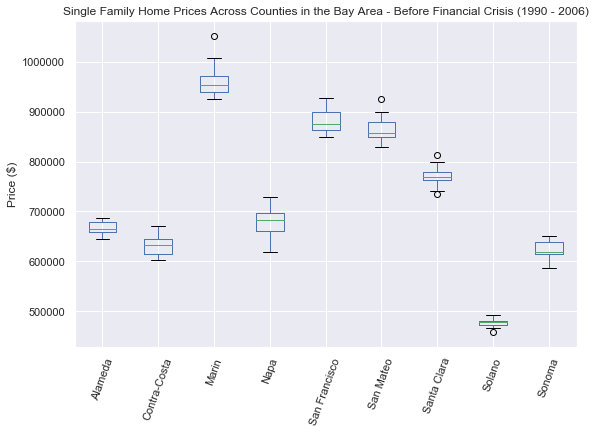

In [82]:
# Before Crisis

plt.figure(figsize=(9,6))
df_bfr_crisis[['Alameda','Contra-Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']].boxplot()
plt.xticks(rotation=70)
plt.ylabel('Price ($)')
plt.title('Single Family Home Prices Across Counties in the Bay Area - Before Financial Crisis (1990 - 2006)')
plt.show()

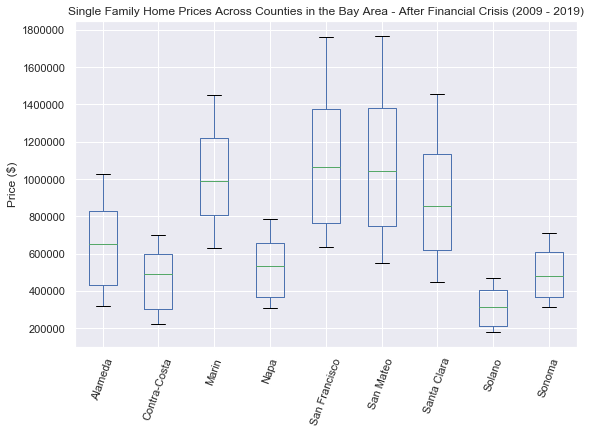

In [83]:
# After Crisis

plt.figure(figsize=(9,6))
df_aft_crisis[['Alameda','Contra-Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']].boxplot()
plt.xticks(rotation=70)
plt.ylabel('Price ($)')
plt.title('Single Family Home Prices Across Counties in the Bay Area - After Financial Crisis (2009 - 2019)')
plt.show()

Based on the above figures, for both before and after the financial crisis, my 3 groups are: 

- **Expensive** : Marin, San Francisco, San Mateo, Santa Clara
- **Medium** : Alameda , Contra-Costa, Napa, Sonoma 
- **Cheap** : Solano 

But before making detasets, let's add two columns that we need through our project in advance: 

**Julian** and **Constant** 

In [84]:
# Add Julian column + Add Constant Column
df['Julian'] = df['Time'].apply(lambda x: x.to_julian_date() )
df = add_constant(df) 

In [85]:
df.head()

,Time,CA,Alameda,Contra-Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma,Bay Area,Julian,Const
0,1990-01-01,194952,226149,NaN,346153,178888,287499,NaN,271840,NaN,174022,227366,2447892.5,1.0
1,1990-02-01,196273,219306,NaN,338333,186363,300877,NaN,273100,NaN,180294,234739,2447923.5,1.0
2,1990-03-01,194856,225162,NaN,358571,180000,290151,NaN,275500,NaN,178823,235337,2447951.5,1.0
3,1990-04-01,196111,229333,NaN,359574,158571,288725,NaN,274660,NaN,184117,233178,2447982.5,1.0
4,1990-05-01,195281,232291,NaN,374999,187692,282626,NaN,266670,NaN,185844,235881,2448012.5,1.0


In [86]:
df_exp = df[['Time','Julian','Const','Marin','San Francisco','San Mateo','Santa Clara']].copy()
df_med = df[['Time','Julian','Const','Alameda','Contra-Costa','Napa','Sonoma']].copy()
df_che = df[['Time','Julian','Const','Solano']].dropna().copy()

In [87]:
df_exp['Average'] = df_exp[['Marin','San Francisco','San Mateo','Santa Clara']].mean(axis=1) 
df_med['Average'] = df_med[['Alameda','Contra-Costa','Napa','Sonoma']].mean(axis=1) 
df_che['Average'] = df_che[['Solano']].mean(axis=1)

Let's plot all groups' average through time: 

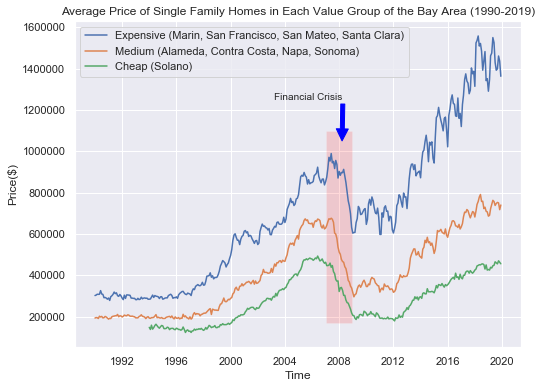

In [88]:
# 

plt.figure(figsize=(8,6))
ax = sns.lineplot(x = df_exp['Time'], y=df_exp['Average'])
sns.lineplot(x = df_med['Time'], y = df_med['Average'])
sns.lineplot(x = df_che['Time'], y = df_che['Average'])
plt.title('Average Price of Single Family Homes in Each Value Group of the Bay Area (1990-2019)')
ax.fill_between([732700,733400], 170000, 1100000, facecolor='red', alpha = .15, interpolate=True)
plt.annotate(s='Financial Crisis', xy=(733120,1050000), xytext=(731300,1250000), arrowprops={'color':'blue','lw':1.01})
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.legend(['Expensive (Marin, San Francisco, San Mateo, Santa Clara)','Medium (Alameda, Contra Costa, Napa, Sonoma)','Cheap (Solano)'])
plt.show()

<br>
 
<font color=blue, size=6 > Cycles in Different Value Groups </font> 

</br>

In [89]:
# Make datasets

df_bfr_crisis_exp = df_exp[df_exp['Time'].dt.year < 2007 ].copy()
df_bfr_crisis_med = df_med[df_med['Time'].dt.year < 2007 ].copy()
df_bfr_crisis_che = df_che[df_che['Time'].dt.year < 2007 ].copy()

# -------------------------------- 

df_aft_crisis_exp = df_exp[df_exp['Time'].dt.year >= 2009 ].copy()
df_aft_crisis_med = df_med[df_med['Time'].dt.year >= 2009 ].copy()
df_aft_crisis_che = df_che[df_che['Time'].dt.year >= 2009 ].copy()


# A - Before Financial Crisis (1990 - 2006 ):

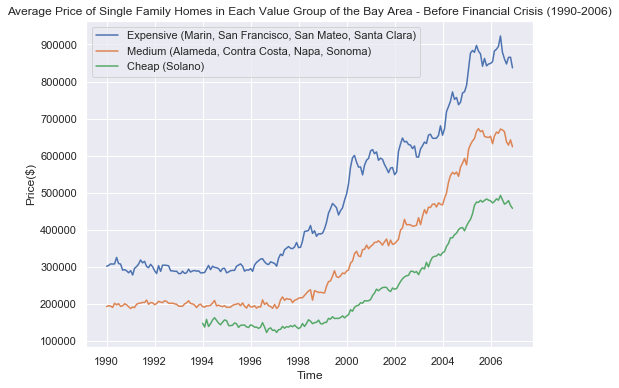

In [90]:
# Visualize different groups : 

plt.figure(figsize=(8,6))
ax = sns.lineplot(x = df_bfr_crisis_exp['Time'], y=df_bfr_crisis_exp['Average'])
sns.lineplot(x = df_bfr_crisis_med['Time'], y =  df_bfr_crisis_med['Average'])
sns.lineplot(x = df_bfr_crisis_che['Time'], y =  df_bfr_crisis_che['Average'])
plt.title('Average Price of Single Family Homes in Each Value Group of the Bay Area - Before Financial Crisis (1990-2006)')
#ax.fill_between([732700,733400], 170000, 1100000, facecolor='red', alpha = .15, interpolate=True)
#plt.annotate(s='Financial Crisis', xy=(733120,1050000), xytext=(731300,1250000), arrowprops={'color':'blue','lw':1.01})
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.legend(['Expensive (Marin, San Francisco, San Mateo, Santa Clara)','Medium (Alameda, Contra Costa, Napa, Sonoma)','Cheap (Solano)'])
plt.show()

## 1 - Modeling the Drift (Exponential Model & Polynomial Model)

### Exponential Model

In [91]:
# 1 - "EXPENSIVE Class"

# We can actually train a simple exponential model using the log(value), then train further models on the error.
exponential_model_bfr_crisis_exp = Ridge().fit( 
    X=df_bfr_crisis_exp[['Julian', 'Const']], 
    y=np.log(df_bfr_crisis_exp['Average'])
)

# Adding two columns as predicted value by exponential model and its error
df_bfr_crisis_exp['Exponential_Model'] = np.exp(exponential_model_bfr_crisis_exp.predict(df_bfr_crisis_exp[['Julian', 'Const']]))
df_bfr_crisis_exp['Error_Exponential'] = (df_bfr_crisis_exp['Exponential_Model'] / df_bfr_crisis_exp['Average'])-1

In [92]:
# 2 - "Medium Class"

# We can actually train a simple exponential model using the log(value), then train further models on the error.
exponential_model_bfr_crisis_med = Ridge().fit( 
    X=df_bfr_crisis_med[['Julian', 'Const']], 
    y=np.log(df_bfr_crisis_med['Average'])
)

# Adding two columns as predicted value by exponential model and its error
df_bfr_crisis_med['Exponential_Model'] = np.exp(exponential_model_bfr_crisis_med.predict(df_bfr_crisis_med[['Julian', 'Const']]))
df_bfr_crisis_med['Error_Exponential'] = (df_bfr_crisis_med['Exponential_Model'] / df_bfr_crisis_med['Average'])-1

In [93]:
# 3 - "Cheap Class"

# We can actually train a simple exponential model using the log(value), then train further models on the error.
exponential_model_bfr_crisis_che = Ridge().fit( 
    X=df_bfr_crisis_che[['Julian', 'Const']], 
    y=np.log(df_bfr_crisis_che['Average'])
)

# Adding two columns as predicted value by exponential model and its error
df_bfr_crisis_che['Exponential_Model'] = np.exp(exponential_model_bfr_crisis_che.predict(df_bfr_crisis_che[['Julian', 'Const']]))
df_bfr_crisis_che['Error_Exponential'] = (df_bfr_crisis_che['Exponential_Model'] / df_bfr_crisis_che['Average'])-1

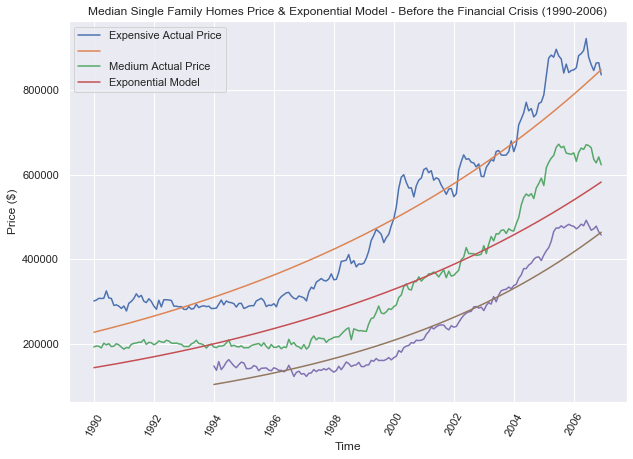

In [94]:
# Plot Exponential Model 

plt.figure(figsize=(10,7))
plt.plot(df_bfr_crisis_exp['Time'], df_bfr_crisis_exp[['Average','Exponential_Model']])
plt.plot(df_bfr_crisis_med['Time'], df_bfr_crisis_med[['Average','Exponential_Model']])
plt.plot(df_bfr_crisis_che['Time'], df_bfr_crisis_che[['Average','Exponential_Model']])
plt.title('Median Single Family Homes Price & Exponential Model - Before the Financial Crisis (1990-2006)') 
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.legend(['Expensive Actual Price','','Medium Actual Price','Exponential Model'])
#plt.legend()
plt.show()

### Polynomial Model

In [95]:
from numpy.polynomial import polynomial
from jdcal import gcal2jd, jd2gcal
from datetime import datetime

In [96]:
## Start Test

In [97]:
# Figure out how to change 'Julian' to 'Date' for xticks labels
m = jd2gcal((df_bfr_crisis_exp['Julian'].iloc[89] - 51544.5) , 51544.5)
t = datetime(m[0],m[1],m[2])
print (type(datetime(m[0], m[1], m[2])))
print (t)
#print (m[0])

<class 'datetime.datetime'>
1997-06-01 00:00:00


In [98]:
# Function to revise the xticks from julian type to datetime in graphs
def jul_to_time(jul):
    date_tuple = jd2gcal((jul - 51544.5), 51544.5)
    date_out = datetime(date_tuple[0], date_tuple[1], date_tuple[2])
    return (date_out)

In [99]:
# It works

df_bfr_crisis_exp['Julian'].iloc[200:].apply(lambda x : jul_to_time(x))

200   2006-09-01
201   2006-10-01
202   2006-11-01
203   2006-12-01
Name: Julian, dtype: datetime64[ns]

In [100]:
# End Test

In [101]:
print (df_bfr_crisis_exp['Julian'].iloc[0])
print (df_bfr_crisis_exp['Julian'].iloc[-1])

2447892.5
2454070.5


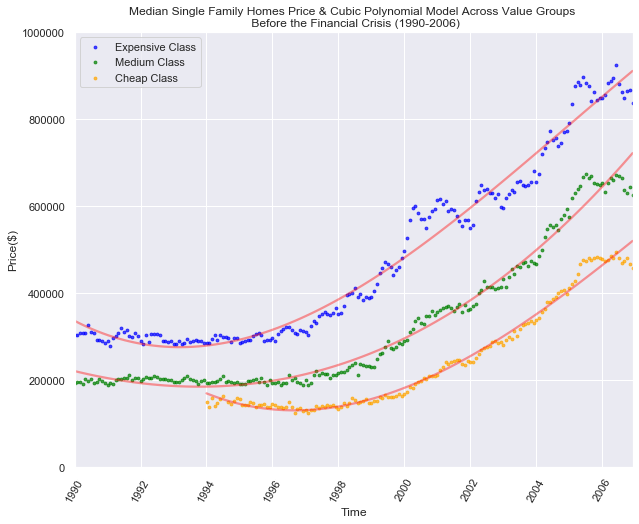

In [102]:
plt.figure(figsize=(10, 8))
ax_1 = sns.regplot(y='Average' , x='Julian', data=df_bfr_crisis_exp, order=3,scatter_kws={"color": "blue","alpha":0.7,'s':8}, ci=0, line_kws={"color": "red","alpha":0.4},truncate=True,label='Expensive Class')
ax_2 = sns.regplot(y='Average' , x='Julian', data=df_bfr_crisis_med, order=3,scatter_kws={"color": "green","alpha":0.7,'s':8}, ci=0, line_kws={"color": "red","alpha":0.4},truncate=True,label='Medium Class')
ax_3 = sns.regplot(y='Average' , x='Julian', data=df_bfr_crisis_che, order=3,scatter_kws={"color": "orange","alpha":0.7,'s':8}, ci=0,  line_kws={"color": "red","alpha":0.4},truncate=True,label='Cheap Class')
plt.xlim([2447892.5,2454070.5])
plt.ylim([0,1000000])
plt.xticks(np.arange(2447892.5,2454070.5, step = 365*2),  labels = np.arange(1990,2008,step=2),rotation=60)
plt.ylabel('Price($)')
plt.xlabel('Time')
ax_1.legend()
ax_2.legend()
ax_3.legend()
plt.title('Median Single Family Homes Price & Cubic Polynomial Model Across Value Groups \n Before the Financial Crisis (1990-2006)')
plt.show()

Now, let's fit the **Cubic Polynomial** model on 3 value groups (Expensive, Medium, Cheap): 

In [103]:
# 'Expensive Class' before the financial crisis (1990 - 2006)
c, stats = polynomial.polyfit(df_bfr_crisis_exp['Julian'],df_bfr_crisis_exp['Average'],3,full=True)
df_bfr_crisis_exp['Poly_Model'] = df_bfr_crisis_exp['Julian'].apply(lambda x :  c[0] + c[1] * x + c[2] * (x**2) + c[3] * (x **3))
df_bfr_crisis_exp['Error_Poly'] = (df_bfr_crisis_exp['Poly_Model']/df_bfr_crisis_exp['Average']) - 1 

In [104]:
# 'Medium Class' before the financial crisis (1990 - 2006)
c, stats = polynomial.polyfit(df_bfr_crisis_med['Julian'],df_bfr_crisis_med['Average'],3,full=True)
df_bfr_crisis_med['Poly_Model'] = df_bfr_crisis_med['Julian'].apply(lambda x :  c[0] + c[1] * x + c[2] * (x**2) + c[3] * (x **3))
df_bfr_crisis_med['Error_Poly'] = (df_bfr_crisis_med['Poly_Model']/df_bfr_crisis_med['Average']) - 1 

In [105]:
# 'Cheap Class' before the financial crisis (1990 - 2006)
c, stats = polynomial.polyfit(df_bfr_crisis_che['Julian'],df_bfr_crisis_che['Average'],3,full=True)
df_bfr_crisis_che['Poly_Model'] = df_bfr_crisis_che['Julian'].apply(lambda x :  c[0] + c[1] * x + c[2] * (x**2) + c[3] * (x **3))
df_bfr_crisis_che['Error_Poly'] = (df_bfr_crisis_che['Poly_Model']/df_bfr_crisis_che['Average']) - 1 

In [106]:
df_bfr_crisis_exp['Error_Poly'].describe()

count    204.000000
mean       0.003679
std        0.062692
min       -0.169725
25%       -0.041935
50%        0.002804
75%        0.053620
max        0.156554
Name: Error_Poly, dtype: float64

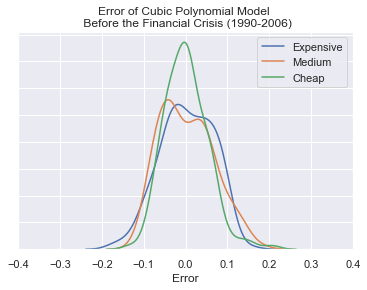

In [107]:
# Histogram of Polynomial Model Error 

#f, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True)
plt.figure(figsize=(6,4))
ax_1 = sns.distplot(df_bfr_crisis_exp['Error_Poly'], bins=None, hist=False, kde=True, label='Expensive')
ax_2 = sns.distplot(df_bfr_crisis_med['Error_Poly'], bins=None, hist=False, kde=True, label='Medium')
ax_3 = sns.distplot(df_bfr_crisis_che['Error_Poly'], bins=None, hist=False, kde=True, label='Cheap')
ax_1.set(yticklabels=[])

plt.xlabel('Error')
plt.xlim(-0.4,0.4)
plt.title('Error of Cubic Polynomial Model \n Before the Financial Crisis (1990-2006)')
plt.show()

## 2 - Modeling Seasonality

### 2 - 1 Expensive Class (Before the Financial Crisis - 1990 to 2006)

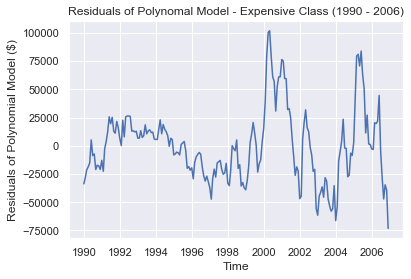

In [108]:
## Add new column as 'residual_poly_model' and visualzie it:

df_bfr_crisis_exp['Residual_Poly_Model'] = df_bfr_crisis_exp['Average'] - df_bfr_crisis_exp['Poly_Model']

## Visualize the residual of the Cubic Polynomial drift: 

ax = sns.lineplot(df_bfr_crisis_exp['Time'],df_bfr_crisis_exp['Residual_Poly_Model'])
plt.xlabel('Time')
plt.ylabel('Residuals of Polynomial Model ($)')
plt.title('Residuals of Polynomal Model - Expensive Class (1990 - 2006)')
plt.show()

Text(0.5, 0, 'Cycles in window of the first 17 years (204 timestamps=months)')

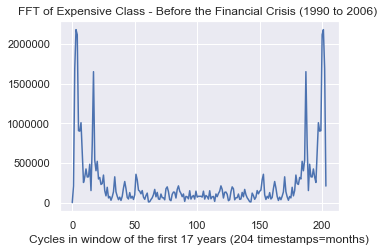

In [109]:
# Let's check the output of Fourier Transform of Bay Area median price

fft_bfr_crisis_exp = fftpack.fft(df_bfr_crisis_exp['Residual_Poly_Model'])
plt.figure(figsize=(5,3.5))
plt.plot(np.abs(fft_bfr_crisis_exp))
plt.title('FFT of Expensive Class - Before the Financial Crisis (1990 to 2006) ')
plt.xlabel('Cycles in window of the first 17 years (204 timestamps=months)')

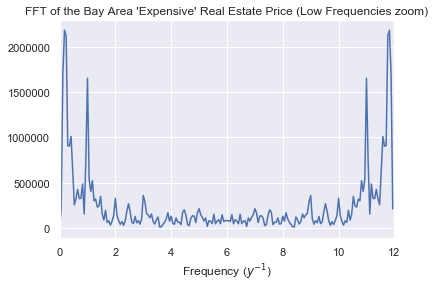

In [110]:

plt.figure(figsize = (6,4))
plt.plot(1./17*np.arange(len(fft_bfr_crisis_exp)), np.abs(fft_bfr_crisis_exp)) #we use np.abs(fft_bay_part) since, the fft_bay_part1 is complex
plt.title("FFT of the Bay Area 'Expensive' Real Estate Price (Low Frequencies zoom)")
plt.xlim([0,12])
#plt.ylim([0,1900000])
plt.xlabel('Frequency ($y^{-1}$)');

<br>
Let's zoom in:


<br>

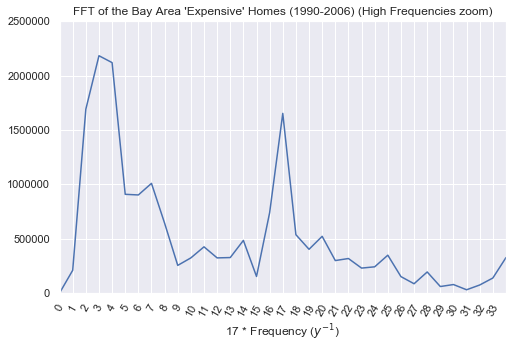

In [111]:
# Zoom in figure of FFT Bay Area (1990 - 2006)
monthly_cycles_in_17_years = 17*12

plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 2,  step=1./17),rotation=60, labels=np.arange(0,34))
plt.plot(1./17 * np.arange(len(fft_bfr_crisis_exp)), np.abs(fft_bfr_crisis_exp))
plt.title("FFT of the Bay Area 'Expensive' Homes (1990-2006) (High Frequencies zoom)")
plt.ylim([0,2500000])
plt.xlim([0, 2])
plt.xlabel('17 * Frequency ($y^{-1}$)'); 

***Description of the above chart:*** 
    
Each tick point on x axis should be devided by **17** and then put it as 1/Year to get the frequency.

For example:

there is a local maximum at tick point (x = 3), so it is basically: 

**3/17 = 1/Year -> Year = 17/3 = 5.67 years**

- Now, let's find the frequencies with highest impact (amplitude of above chart) (Expensive Class Bay Area - 1990 to 2006)

In [112]:
fft_bfr_crisis_abs_exp = np.abs(fft_bfr_crisis_exp)
df_bfr_crisis_cycles_exp = pd.DataFrame(data=fft_bfr_crisis_abs_exp, columns=['FFT Absolute Value'])

In [113]:
# Based on the Nyquist frequency, we just need to check the half of the frequencies (204/2 = 102)

df_bfr_crisis_cycles_exp.iloc[:102].sort_values(by='FFT Absolute Value', ascending=False).head(10)

,FFT Absolute Value
3,2.182232e+06
4,2.118839e+06
2,1.690314e+06
17,1.651940e+06
7,1.008285e+06
5,9.075108e+05
6,9.017024e+05
16,7.389432e+05
8,6.417447e+05
18,5.360667e+05


So based on the above figure and table,  I separated the top 7 periods that have relatively high FFT Absolute Value ***(indices: 3, 4, 2, 17, 7, 5, 6)***. 

Here are the 7 biggest periods of our **Expensive Class Before the Financial Crisis (1990-2006)**: 

In [114]:
df_bfr_crisis_cycles_exp_top = df_bfr_crisis_cycles_exp.iloc[:102].sort_values(by='FFT Absolute Value', ascending=False).iloc[:7]
df_bfr_crisis_cycles_exp_top['Cycle(year)'] = df_bfr_crisis_cycles_exp_top.index.map(lambda x : 17./x)
print (df_bfr_crisis_cycles_exp_top)

    FFT Absolute Value  Cycle(year)
3         2.182232e+06     5.666667
4         2.118839e+06     4.250000
2         1.690314e+06     8.500000
17        1.651940e+06     1.000000
7         1.008285e+06     2.428571
5         9.075108e+05     3.400000
6         9.017024e+05     2.833333


We end up using **7 cycles** with different frequencies.

Basically, based on the above table, I assume these 7 main cycles **: 5.67 , 4.25 , 8.5 , 1 , 2.43 , 3.4 , 2.83  years**.

In [115]:
# 5.67 years -> (should I change 365.25 * 5.67 since, it is night the same thing as 5.67 years)
df_bfr_crisis_exp['sin(5.67years)'] = np.sin(df_bfr_crisis_exp['Julian']/(365.25*5.67) * 2 * np.pi)
df_bfr_crisis_exp['cos(5.67years)'] = np.cos(df_bfr_crisis_exp['Julian']/(365.25*5.67) * 2 * np.pi)

# 4.25 years 
df_bfr_crisis_exp['sin(4.25years)'] = np.sin(df_bfr_crisis_exp['Julian']/(365.25*4.25) * 2 * np.pi)
df_bfr_crisis_exp['cos(4.25years)'] = np.cos(df_bfr_crisis_exp['Julian']/(365.25*4.25) * 2 * np.pi)

# 8.5 years 
df_bfr_crisis_exp['sin(8.5years)'] = np.sin(df_bfr_crisis_exp['Julian']/(365.25*8.5) * 2 * np.pi)
df_bfr_crisis_exp['cos(8.5years)'] = np.cos(df_bfr_crisis_exp['Julian']/(365.25*8.5) * 2 * np.pi)

# 1 year
df_bfr_crisis_exp['sin(year)'] = np.sin(df_bfr_crisis_exp['Julian']/(365.25*1) * 2 * np.pi)
df_bfr_crisis_exp['cos(year)'] = np.cos(df_bfr_crisis_exp['Julian']/(365.25*1) * 2 * np.pi)

# 2.43 years 
df_bfr_crisis_exp['sin(2.43years)'] = np.sin(df_bfr_crisis_exp['Julian']/(365.25*2.43) * 2 * np.pi)
df_bfr_crisis_exp['cos(2.43years)'] = np.cos(df_bfr_crisis_exp['Julian']/(365.25*2.43) * 2 * np.pi)

# 3.4 years 
df_bfr_crisis_exp['sin(3.4years)'] = np.sin(df_bfr_crisis_exp['Julian']/(365.25*3.4) * 2 * np.pi)
df_bfr_crisis_exp['cos(3.4years)'] = np.cos(df_bfr_crisis_exp['Julian']/(365.25*3.4) * 2 * np.pi)

# 2.83 years 
df_bfr_crisis_exp['sin(2.83years)'] = np.sin(df_bfr_crisis_exp['Julian']/(365.25*2.83) * 2 * np.pi)
df_bfr_crisis_exp['cos(2.83years)'] = np.cos(df_bfr_crisis_exp['Julian']/(365.25*2.83) * 2 * np.pi)

The goal is prediction based on the historical data. For this purpose, I am going to **shift** the value column (Residual_Poly_Model) to few earlier timestamps (let's do it for **2 months** in advance) and put it as the **Goal** of our predictive model. 

In [116]:
# Let's shift the data to 2 month (shift(-2)) in advance and create the new column as 'Seasonality_Model_Goal'

df_bfr_crisis_exp['Seasonality_Model_Goal'] = df_bfr_crisis_exp['Residual_Poly_Model'].shift(-2)

508997630.1885661
22560.975825273297


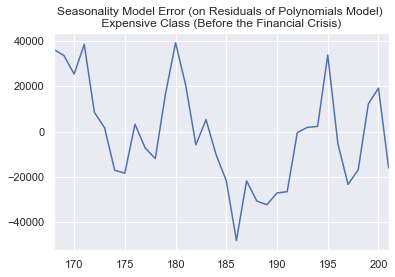

In [117]:
cut_year = 2004  # The whole dataset have monthly data from 1990 to the end of 2006
                 # So basically 3 years out of 17 years is testing dataset and 13 years is training set

train_bfr_crisis_exp = df_bfr_crisis_exp[df_bfr_crisis_exp.Time.dt.year < cut_year].dropna(how='any')
test_bfr_crisis_exp = df_bfr_crisis_exp[df_bfr_crisis_exp.Time.dt.year >= cut_year].dropna(how='any')

regress = LinearRegression().fit( 
        X=train_bfr_crisis_exp[['Residual_Poly_Model', 'sin(5.67years)', 'cos(5.67years)', 'sin(4.25years)','cos(4.25years)','sin(8.5years)','cos(8.5years)', 'sin(year)', 'cos(year)',
                           'sin(2.43years)','cos(2.43years)','sin(3.4years)','cos(3.4years)','sin(2.83years)','cos(2.83years)']], 
        y=train_bfr_crisis_exp['Seasonality_Model_Goal'])

test_bfr_crisis_exp['Predicted_Residual'] = regress.predict(X=test_bfr_crisis_exp[['Residual_Poly_Model', 'sin(5.67years)', 'cos(5.67years)', 'sin(4.25years)','cos(4.25years)','sin(8.5years)','cos(8.5years)', 'sin(year)', 'cos(year)',
                           'sin(2.43years)','cos(2.43years)','sin(3.4years)','cos(3.4years)','sin(2.83years)','cos(2.83years)']])

(test_bfr_crisis_exp['Seasonality_Model_Goal'] - test_bfr_crisis_exp['Predicted_Residual']).plot()
plt.title('Seasonality Model Error (on Residuals of Polynomials Model) \n Expensive Class (Before the Financial Crisis) ')
print(mean_squared_error(test_bfr_crisis_exp['Seasonality_Model_Goal'], test_bfr_crisis_exp['Predicted_Residual']))
print (np.sqrt(mean_squared_error(test_bfr_crisis_exp['Seasonality_Model_Goal'], test_bfr_crisis_exp['Predicted_Residual'])))

### Adding Back Seasonality and Drift

Now let's put back drift and seasonality to compare the models with real data.

#### Example : 
    
For point 3 -> **Predicted value = exponential_model point 3 + seasonality_model (on residuals) of point 1** 

So the predicted residuals should be shifted (2 month forward (.shift(2)) 

In [118]:
test_bfr_crisis_exp['Shifted_Back_Predicted_Residual'] = test_bfr_crisis_exp['Predicted_Residual'].shift(2)
test_bfr_crisis_exp['Final_Predicted_Value'] = test_bfr_crisis_exp['Average'] + test_bfr_crisis_exp['Shifted_Back_Predicted_Residual']
test_bfr_crisis_exp['Error_Final'] = (test_bfr_crisis_exp['Final_Predicted_Value'] / test_bfr_crisis_exp['Average'])-1

In [119]:
test_bfr_crisis_exp.head(4)

,Time,Julian,Const,Marin,San Francisco,San Mateo,Santa Clara,Average,Exponential_Model,Error_Exponential,...,cos(2.43years),sin(3.4years),cos(3.4years),sin(2.83years),cos(2.83years),Seasonality_Model_Goal,Predicted_Residual,Shifted_Back_Predicted_Residual,Final_Predicted_Value,Error_Final
168,2004-01-01,2453005.5,1.0,741802,648674,675000.0,555000,655119.00,676745.849999,0.033012,...,0.130306,0.978261,-0.207380,0.736731,0.676185,-13569.984375,-49765.994445,NaN,NaN,NaN
169,2004-02-01,2453036.5,1.0,765625,671195,690000.0,565000,672955.00,681229.179998,0.012295,...,0.343022,0.933859,-0.357642,0.850355,0.526209,-5055.242188,-38588.482917,NaN,NaN,NaN
170,2004-03-01,2453065.5,1.0,828629,700330,725000.0,620000,718489.75,685450.147893,-0.045985,...,0.527307,0.871537,-0.490330,0.929457,0.368929,4123.695312,-21236.558552,-49765.994445,668723.755555,-0.069265
171,2004-04-01,2453096.5,1.0,862500,707010,745000.0,615500,732502.50,689991.142435,-0.058036,...,0.699633,0.784248,-0.620448,0.982114,0.188290,23536.515625,-14903.189396,-38588.482917,693914.017083,-0.052680


In [120]:
test_bfr_crisis_exp['Error_Final'].describe()

count    32.000000
mean      0.016318
std       0.042756
min      -0.069265
25%      -0.012952
50%       0.019470
75%       0.041131
max       0.087687
Name: Error_Final, dtype: float64

/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


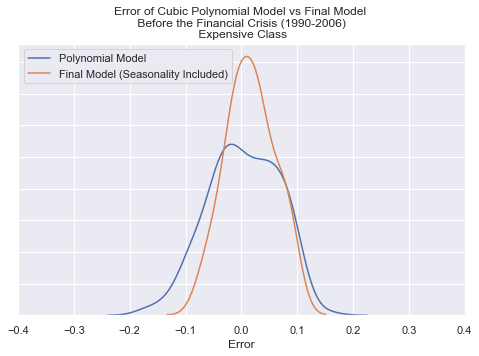

In [121]:
# Histogram of Polynomial Model Error 

#f, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True)
plt.figure(figsize=(8,5))
ax_1 = sns.distplot(df_bfr_crisis_exp['Error_Poly'].iloc[:204], bins=None, hist=False, kde=True, label='Polynomial Model')
ax_2 = sns.distplot(test_bfr_crisis_exp['Error_Final'], bins=None, hist=False, kde=True, label='Final Model (Seasonality Included)')
ax_1.set(yticklabels=[])

plt.xlabel('Error')
plt.xlim(-0.4,0.4)
plt.title('Error of Cubic Polynomial Model vs Final Model \n Before the Financial Crisis (1990-2006) \n Expensive Class')
plt.legend(loc='upper left')
plt.show()

In [122]:
df_bfr_crisis_exp['Error_Poly'].describe()

count    204.000000
mean       0.003679
std        0.062692
min       -0.169725
25%       -0.041935
50%        0.002804
75%        0.053620
max        0.156554
Name: Error_Poly, dtype: float64

In [123]:
test_bfr_crisis_exp[['Time','Average','Residual_Poly_Model','Error_Poly','Final_Predicted_Value','Error_Final']]

,Time,Average,Residual_Poly_Model,Error_Poly,Final_Predicted_Value,Error_Final
168,2004-01-01,655119.00,-66317.148438,0.101229,NaN,NaN
169,2004-02-01,672955.00,-53966.937500,0.080194,NaN,NaN
170,2004-03-01,718489.75,-13569.984375,0.018887,668723.755555,-0.069265
171,2004-04-01,732502.50,-5055.242188,0.006901,693914.017083,-0.052680
172,2004-05-01,747007.25,4123.695312,-0.005520,725770.691448,-0.028429
173,2004-06-01,771928.25,23536.515625,-0.030491,757025.060604,-0.019306
174,2004-07-01,751747.75,-1978.648438,0.002632,741339.929157,-0.013845
175,2004-08-01,756989.25,-2253.367188,0.002977,753043.306268,-0.005213
176,2004-09-01,737333.25,-27428.812500,0.037200,727001.921866,-0.014012
177,2004-10-01,744021.25,-26084.773438,0.035059,736287.068491,-0.010395


In [124]:
print ('The mean and median error of Exponential Model: {} , {}'.format(np.mean(test_bfr_crisis_exp['Error_Poly']),np.median(test_bfr_crisis_exp['Error_Poly'])))
print ('The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): {} , {}'.format(np.mean(test_bfr_crisis_exp['Error_Final']),np.nanmedian(test_bfr_crisis_exp['Error_Final'])))

The mean and median error of Exponential Model: -0.008758529691795003 , -0.0016396529026999618
The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): 0.016317936300466795 , 0.019470128180159918


In [125]:
# std deviation - Polynomial Model vs Final Model
print (df_bfr_crisis_exp['Error_Poly'].std())
print (test_bfr_crisis_exp['Error_Final'].std())

0.06269173245977336
0.04275582192847768


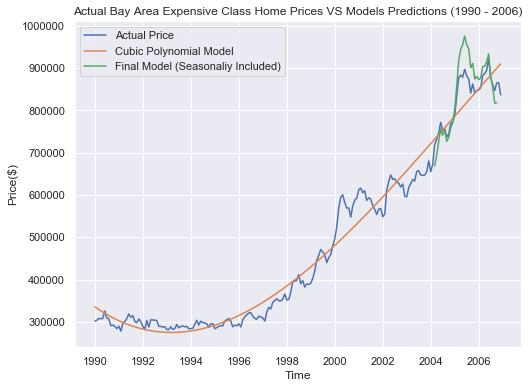

In [126]:
plt.figure(figsize=(8, 6))
plt.plot(df_bfr_crisis_exp['Time'],df_bfr_crisis_exp['Average'])
plt.plot(df_bfr_crisis_exp['Time'],df_bfr_crisis_exp['Poly_Model'])
plt.plot(test_bfr_crisis_exp['Time'],test_bfr_crisis_exp['Final_Predicted_Value'])
plt.legend(['Actual Price','Cubic Polynomial Model','Final Model (Seasonaliy Included)'])
plt.title('Actual Bay Area Expensive Class Home Prices VS Models Predictions (1990 - 2006)')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.show()

### 2 - 2 Medium Class (Before the Financial Crisis - 1990 to 2006)

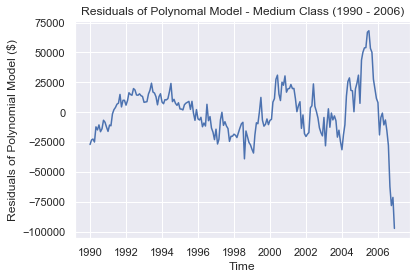

In [127]:
## Add new column as 'residual_poly_model' and visualzie it:

df_bfr_crisis_med['Residual_Poly_Model'] = df_bfr_crisis_med['Average'] - df_bfr_crisis_med['Poly_Model']

## Visualize the residual of the Cubic Polynomial drift: 

ax = sns.lineplot(df_bfr_crisis_med['Time'],df_bfr_crisis_med['Residual_Poly_Model'])
plt.xlabel('Time')
plt.ylabel('Residuals of Polynomial Model ($)')
plt.title('Residuals of Polynomal Model - Medium Class (1990 - 2006)')
plt.show()

Text(0.5, 0, 'Cycles in window of the first 17 years (204 timestamps=months)')

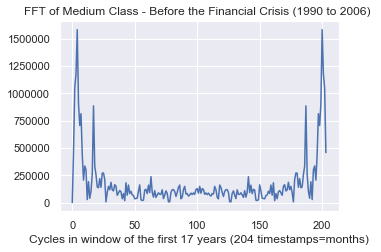

In [128]:
# Let's check the output of Fourier Transform of Bay Area median price

fft_bfr_crisis_med = fftpack.fft(df_bfr_crisis_med['Residual_Poly_Model'])
plt.figure(figsize=(5,3.5))
plt.plot(np.abs(fft_bfr_crisis_med))
plt.title('FFT of Medium Class - Before the Financial Crisis (1990 to 2006) ')
plt.xlabel('Cycles in window of the first 17 years (204 timestamps=months)')

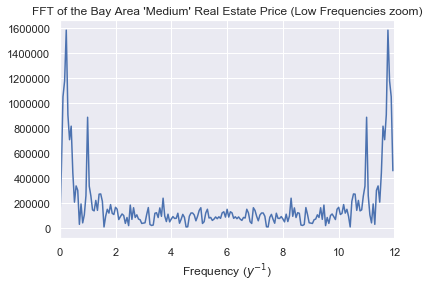

In [129]:
plt.figure(figsize = (6,4))
plt.plot(1./17*np.arange(len(fft_bfr_crisis_med)), np.abs(fft_bfr_crisis_med)) #we use np.abs(fft_bay_part) since, the fft_bay_part1 is complex
plt.title("FFT of the Bay Area 'Medium' Real Estate Price (Low Frequencies zoom)")
plt.xlim([0,12])
#plt.ylim([0,1900000])
plt.xlabel('Frequency ($y^{-1}$)');

Let's zoom in:

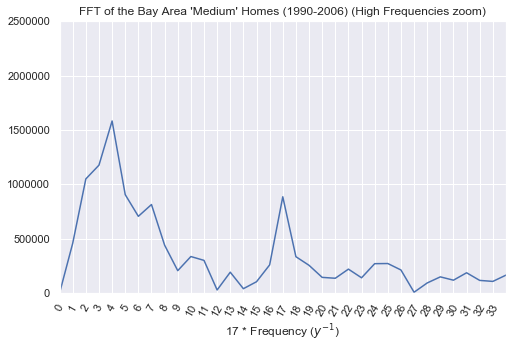

In [130]:
# Zoom in figure of FFT Bay Area (1990 - 2007)
monthly_cycles_in_17_years = 17*12

plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 2,  step=1./17),rotation=60, labels=np.arange(0,34))
plt.plot(1./17 * np.arange(len(fft_bfr_crisis_med)), np.abs(fft_bfr_crisis_med))
plt.title("FFT of the Bay Area 'Medium' Homes (1990-2006) (High Frequencies zoom)")
plt.ylim([0,2500000])
plt.xlim([0, 2])
plt.xlabel('17 * Frequency ($y^{-1}$)');

***Description of the above chart:*** 
    
Each tick point on x axis should be devided by **17** and then put it as 1/Year to get the frequency.

For example:

there is a local maximum at tick point (x = 4), so it is basically: 

**4/17 = 1/Year -> Year = 17/4 = 4.25 years**

- Now, let's find the frequencies with highest impact (amplitude of above chart) (Expensive Class Bay Area - 1990 to 2006)

In [131]:
fft_bfr_crisis_abs_med = np.abs(fft_bfr_crisis_med)
df_bfr_crisis_cycles_med = pd.DataFrame(data=fft_bfr_crisis_abs_med, columns=['FFT Absolute Value'])

In [132]:
# Based on the Nyquist frequency, we just need to check the half of the frequencies (204/2 = 102)

df_bfr_crisis_cycles_med.iloc[:102].sort_values(by='FFT Absolute Value', ascending=False).head(10)

,FFT Absolute Value
4,1.581957e+06
3,1.175641e+06
2,1.049088e+06
5,9.045461e+05
17,8.848543e+05
7,8.135849e+05
6,7.051189e+05
1,4.568515e+05
8,4.399497e+05
10,3.352509e+05


So based on the above figure and table,  I separated the top 7 periods that have relatively high FFT Absolute Value ***(indices: 4, 3, 2, 5, 17, 7, 6)***. 

Here are the 7 biggest periods of our **Medium Class Before the Financial Crisis (1990-2006)**: 

In [133]:
df_bfr_crisis_cycles_med_top = df_bfr_crisis_cycles_med.iloc[:102].sort_values(by='FFT Absolute Value', ascending=False).iloc[:7]
df_bfr_crisis_cycles_med_top['Cycle(year)'] = df_bfr_crisis_cycles_med_top.index.map(lambda x : 17./x)
print (df_bfr_crisis_cycles_med_top)

    FFT Absolute Value  Cycle(year)
4         1.581957e+06     4.250000
3         1.175641e+06     5.666667
2         1.049088e+06     8.500000
5         9.045461e+05     3.400000
17        8.848543e+05     1.000000
7         8.135849e+05     2.428571
6         7.051189e+05     2.833333


We end up using **7 cycles** with different frequencies.

Basically, based on the above table, I assume these 7 main cycles **: 4.25, 5.67 , 8.5 , 3.4, 1 , 2.43 , 2.83  years**.

In [134]:
# 4.25 years 
df_bfr_crisis_med['sin(4.25years)'] = np.sin(df_bfr_crisis_med['Julian']/(365.25*4.25) * 2 * np.pi)
df_bfr_crisis_med['cos(4.25years)'] = np.cos(df_bfr_crisis_med['Julian']/(365.25*4.25) * 2 * np.pi)

# 5.67 years -> (should I change 365.25 * 5.67 since, it is night the same thing as 5.67 years)
df_bfr_crisis_med['sin(5.67years)'] = np.sin(df_bfr_crisis_med['Julian']/(365.25*5.67) * 2 * np.pi)
df_bfr_crisis_med['cos(5.67years)'] = np.cos(df_bfr_crisis_med['Julian']/(365.25*5.67) * 2 * np.pi)

# 8.5 years 
df_bfr_crisis_med['sin(8.5years)'] = np.sin(df_bfr_crisis_med['Julian']/(365.25*8.5) * 2 * np.pi)
df_bfr_crisis_med['cos(8.5years)'] = np.cos(df_bfr_crisis_med['Julian']/(365.25*8.5) * 2 * np.pi)

# 3.4 years 
df_bfr_crisis_med['sin(3.4years)'] = np.sin(df_bfr_crisis_med['Julian']/(365.25*3.4) * 2 * np.pi)
df_bfr_crisis_med['cos(3.4years)'] = np.cos(df_bfr_crisis_med['Julian']/(365.25*3.4) * 2 * np.pi)

# 1 year
df_bfr_crisis_med['sin(year)'] = np.sin(df_bfr_crisis_med['Julian']/(365.25*1) * 2 * np.pi)
df_bfr_crisis_med['cos(year)'] = np.cos(df_bfr_crisis_med['Julian']/(365.25*1) * 2 * np.pi)

# 2.43 years 
df_bfr_crisis_med['sin(2.43years)'] = np.sin(df_bfr_crisis_med['Julian']/(365.25*2.43) * 2 * np.pi)
df_bfr_crisis_med['cos(2.43years)'] = np.cos(df_bfr_crisis_med['Julian']/(365.25*2.43) * 2 * np.pi)

# 2.83 years 
df_bfr_crisis_med['sin(2.83years)'] = np.sin(df_bfr_crisis_med['Julian']/(365.25*2.83) * 2 * np.pi)
df_bfr_crisis_med['cos(2.83years)'] = np.cos(df_bfr_crisis_med['Julian']/(365.25*2.83) * 2 * np.pi)

The goal is prediction based on the historical data. For this purpose, I am going to **shift** the value column (Residual_Poly_Model) to few earlier timestamps (let's do it for **2 months** in advance) and put it as the **Goal** of our predictive model. 

In [135]:
# Let's shift the data to 2 month (shift(-2)) in advance and create the new column as 'Seasonality_Model_Goal'

df_bfr_crisis_med['Seasonality_Model_Goal'] = df_bfr_crisis_med['Residual_Poly_Model'].shift(-2)

510666095.8581065
22597.922379238906


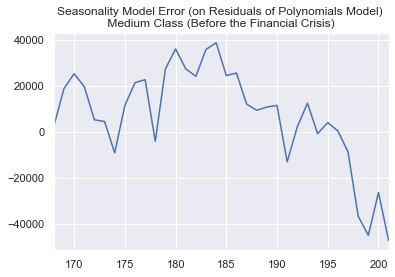

In [136]:
cut_year = 2004  # The whole dataset have monthly data from 1990 to the end of 2006
                 # So basically 3 years out of 17 years is testing dataset and 13 years is training set

train_bfr_crisis_med = df_bfr_crisis_med[df_bfr_crisis_med.Time.dt.year < cut_year].dropna(subset = ['Average','Seasonality_Model_Goal']).copy()
test_bfr_crisis_med = df_bfr_crisis_med[df_bfr_crisis_med.Time.dt.year >= cut_year].dropna(subset = ['Average','Seasonality_Model_Goal']).copy()

regress = LinearRegression().fit( 
        X=train_bfr_crisis_med[['Residual_Poly_Model', 'sin(4.25years)','cos(4.25years)','sin(5.67years)', 'cos(5.67years)', 'sin(8.5years)','cos(8.5years)','sin(3.4years)','cos(3.4years)','sin(year)', 'cos(year)','sin(2.43years)','cos(2.43years)','sin(2.83years)','cos(2.83years)']], 
        y=train_bfr_crisis_med['Seasonality_Model_Goal'])

test_bfr_crisis_med['Predicted_Residual'] = regress.predict(X=test_bfr_crisis_med[['Residual_Poly_Model', 'sin(4.25years)','cos(4.25years)','sin(5.67years)', 'cos(5.67years)', 'sin(8.5years)','cos(8.5years)','sin(3.4years)','cos(3.4years)',
                                'sin(year)', 'cos(year)','sin(2.43years)','cos(2.43years)','sin(2.83years)','cos(2.83years)']])

(test_bfr_crisis_med['Seasonality_Model_Goal'] - test_bfr_crisis_med['Predicted_Residual']).plot()
plt.title('Seasonality Model Error (on Residuals of Polynomials Model) \n Medium Class (Before the Financial Crisis) ')
print(mean_squared_error(test_bfr_crisis_med['Seasonality_Model_Goal'], test_bfr_crisis_med['Predicted_Residual']))
print (np.sqrt(mean_squared_error(test_bfr_crisis_med['Seasonality_Model_Goal'], test_bfr_crisis_med['Predicted_Residual'])))

### Adding Back Seasonality and Drift

Now let's put back drift and seasonality to compare the models with real data.

#### Example : 
    
For point 3 -> **Predicted value = exponential_model point 3 + seasonality_model (on residuals) of point 1** 

So the predicted residuals should be shifted (2 month forward (.shift(2)) 

In [137]:
test_bfr_crisis_med['Shifted_Back_Predicted_Residual'] = test_bfr_crisis_med['Predicted_Residual'].shift(2)
test_bfr_crisis_med['Final_Predicted_Value'] = test_bfr_crisis_med['Average'] + test_bfr_crisis_med['Shifted_Back_Predicted_Residual']
test_bfr_crisis_med['Error_Final'] = (test_bfr_crisis_med['Final_Predicted_Value'] / test_bfr_crisis_med['Average'])-1

In [138]:
test_bfr_crisis_med['Error_Final'].describe()

count    32.000000
mean      0.006693
std       0.026490
min      -0.053026
25%      -0.011711
50%       0.013685
75%       0.023486
max       0.046428
Name: Error_Final, dtype: float64

/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


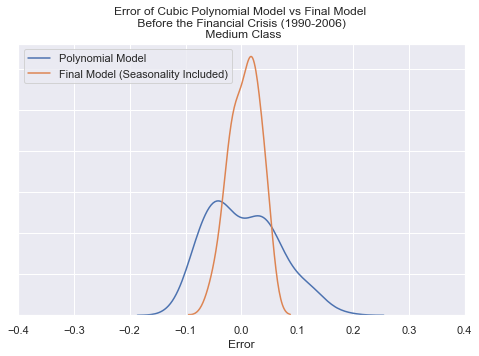

In [139]:
# Histogram of Polynomial Model Error 

#f, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True)
plt.figure(figsize=(8,5))
ax_1 = sns.distplot(df_bfr_crisis_med['Error_Poly'], bins=None, hist=False, kde=True, label='Polynomial Model')
ax_2 = sns.distplot(test_bfr_crisis_med['Error_Final'], bins=None, hist=False, kde=True, label='Final Model (Seasonality Included)')
ax_1.set(yticklabels=[])

plt.xlabel('Error')
plt.xlim(-0.4,0.4)
plt.title('Error of Cubic Polynomial Model vs Final Model \n Before the Financial Crisis (1990-2006) \n Medium Class')
plt.legend(loc='upper left')
plt.show()

In [140]:
test_bfr_crisis_med['Error_Poly'].describe()

count    34.000000
mean     -0.018584
std       0.054449
min      -0.101304
25%      -0.052190
50%      -0.027566
75%       0.014477
max       0.124208
Name: Error_Poly, dtype: float64

In [141]:
test_bfr_crisis_med[['Time','Average','Residual_Poly_Model','Error_Poly','Final_Predicted_Value','Error_Final']]

,Time,Average,Residual_Poly_Model,Error_Poly,Final_Predicted_Value,Error_Final
168,2004-01-01,467181.333333,-31377.604167,0.067164,NaN,NaN
169,2004-02-01,485217.333333,-18899.801432,0.038951,NaN,NaN
170,2004-03-01,498859.000000,-10506.439453,0.021061,485705.010106,-0.026368
171,2004-04-01,528527.333333,13499.472005,-0.025542,522983.364719,-0.010489
172,2004-05-01,546222.000000,25662.931641,-0.046983,546388.309197,0.000304
173,2004-06-01,555063.333333,28735.388021,-0.051770,563861.247133,0.015850
174,2004-07-01,550276.333333,18313.911458,-0.033281,563110.891118,0.023324
175,2004-08-01,555758.000000,17919.744141,-0.032244,568948.610104,0.023734
176,2004-09-01,544185.000000,416.373047,-0.000765,553490.997696,0.017101
177,2004-10-01,569059.333333,19499.585286,-0.034266,576875.887841,0.013736


In [142]:
print ('The mean and median error of Exponential Model: {} , {}'.format(np.mean(test_bfr_crisis_med['Error_Poly']),np.median(test_bfr_crisis_med['Error_Poly'])))
print ('The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): {} , {}'.format(np.mean(test_bfr_crisis_med['Error_Final']),np.nanmedian(test_bfr_crisis_med['Error_Final'])))

The mean and median error of Exponential Model: -0.018584462419597433 , -0.027566488566298675
The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): 0.006692992126374961 , 0.013684557844476974


In [143]:
# std deviation - Polynomial Model vs Final Model
print (test_bfr_crisis_med['Error_Poly'].std())
print (test_bfr_crisis_med['Error_Final'].std())

0.05444894857115858
0.02648965585828738


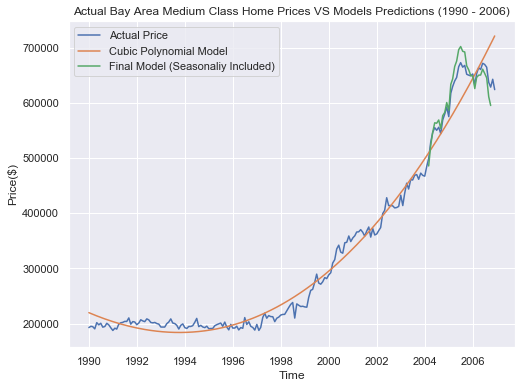

In [144]:
plt.figure(figsize=(8, 6))
plt.plot(df_bfr_crisis_med['Time'],df_bfr_crisis_med['Average'])
plt.plot(df_bfr_crisis_med['Time'],df_bfr_crisis_med['Poly_Model'])
plt.plot(test_bfr_crisis_med['Time'],test_bfr_crisis_med['Final_Predicted_Value'])
plt.legend(['Actual Price','Cubic Polynomial Model','Final Model (Seasonaliy Included)'])
plt.title('Actual Bay Area Medium Class Home Prices VS Models Predictions (1990 - 2006)')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.show()

### 2 - 3 Cheap Class (Before the Financial Crisis - 1990 to 2006)

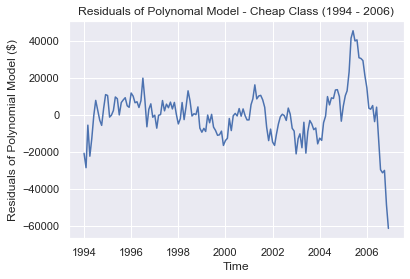

In [145]:
## Add new column as 'residual_poly_model' and visualzie it:

df_bfr_crisis_che['Residual_Poly_Model'] = df_bfr_crisis_che['Average'] - df_bfr_crisis_che['Poly_Model']

## Visualize the residual of the Cubic Polynomial drift: 

ax = sns.lineplot(df_bfr_crisis_che['Time'],df_bfr_crisis_che['Residual_Poly_Model'])
plt.xlabel('Time')
plt.ylabel('Residuals of Polynomial Model ($)')
plt.title('Residuals of Polynomal Model - Cheap Class (1994 - 2006)')
plt.show()

Text(0.5, 0, 'Cycles in window of the first 12.91 years (155 timestamps=months)')

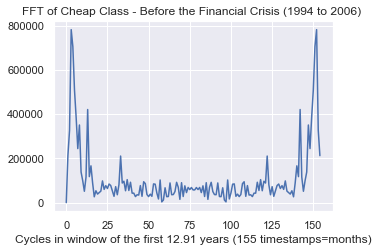

In [146]:
# Let's check the output of Fourier Transform of Bay Area median price

fft_bfr_crisis_che = fftpack.fft(df_bfr_crisis_che['Residual_Poly_Model'])
plt.figure(figsize=(5,3.5))
plt.plot(np.abs(fft_bfr_crisis_che))
plt.title('FFT of Cheap Class - Before the Financial Crisis (1994 to 2006) ')
plt.xlabel('Cycles in window of the first 12.91 years (155 timestamps=months)')

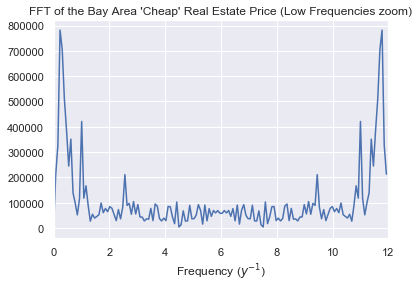

In [147]:

plt.figure(figsize = (6,4))
plt.plot(1./12.91*np.arange(len(fft_bfr_crisis_che)), np.abs(fft_bfr_crisis_che)) #we use np.abs(fft_bay_part) since, the fft_bay_part1 is complex
plt.title("FFT of the Bay Area 'Cheap' Real Estate Price (Low Frequencies zoom)")
plt.xlim([0,12])
#plt.ylim([0,1900000])
plt.xlabel('Frequency ($y^{-1}$)');

Let's zoom in: 

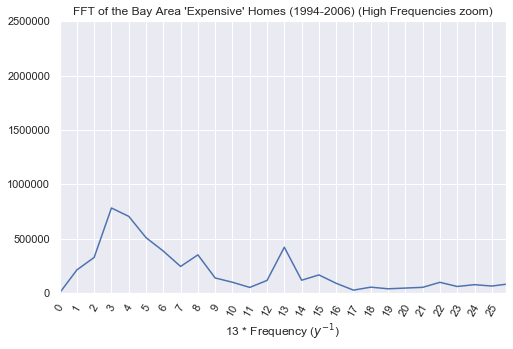

In [148]:
# Zoom in figure of FFT Bay Area (1990 - 2006)
monthly_cycles_in_13_years = 13*12

plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 2,  step=1./12.91),rotation=60, labels=np.arange(0,26))
plt.plot(1./12.91 * np.arange(len(fft_bfr_crisis_che)), np.abs(fft_bfr_crisis_che))
plt.title("FFT of the Bay Area 'Expensive' Homes (1994-2006) (High Frequencies zoom)")
plt.ylim([0,2500000])
plt.xlim([0, 2])
plt.xlabel('13 * Frequency ($y^{-1}$)'); 

***Description of the above chart:*** 
    
Each tick point on x axis should be devided by **13** and then put it as 1/Year to get the frequency.

For example:

there is a local maximum at tick point (x = 3), so it is basically: 

**3/13 = 1/Year -> Year = 13/3 = 4.33 years**

- Now, let's find the frequencies with highest impact (amplitude of above chart) (Cheap Class Bay Area - 1994 to 2006)

In [149]:
fft_bfr_crisis_abs_che = np.abs(fft_bfr_crisis_che)
df_bfr_crisis_cycles_che = pd.DataFrame(data=fft_bfr_crisis_abs_che, columns=['FFT Absolute Value'])

In [150]:
# Based on the Nyquist frequency, we just need to check the half of the frequencies (155/2 = 78)

df_bfr_crisis_cycles_che.iloc[:78].sort_values(by='FFT Absolute Value', ascending=False).head(10)

,FFT Absolute Value
3,781639.728599
4,704974.407326
5,509033.306548
13,420667.941040
6,385419.500981
8,350720.711190
2,327073.618304
7,244134.392630
1,212153.713698
33,210376.899021


So based on the above figure and table,  I separated the top 7 periods that have relatively high FFT Absolute Value ***(indices: 3, 4, 5, 13, 6, 8, 2)***. 

Here are the 7 biggest periods of our **Cheap Class Before the Financial Crisis (1994-2006)**: 

In [151]:
df_bfr_crisis_cycles_che_top = df_bfr_crisis_cycles_che.iloc[:102].sort_values(by='FFT Absolute Value', ascending=False).iloc[:7]
df_bfr_crisis_cycles_che_top['Cycle(year)'] = df_bfr_crisis_cycles_che_top.index.map(lambda x : 13/x)
print (df_bfr_crisis_cycles_che_top)

    FFT Absolute Value  Cycle(year)
3        781639.728599     4.333333
4        704974.407326     3.250000
5        509033.306548     2.600000
13       420667.941040     1.000000
6        385419.500981     2.166667
8        350720.711190     1.625000
2        327073.618304     6.500000


We end up using **7 cycles** with different frequencies.

Basically, based on the above table, I assume these 7 main cycles **: 4.33, 3.25 , 2.6 , 1, 2.17 , 1.63 , 6.5  years**.

In [152]:
# 4.33 years -> (should I change 365.25 * 4.33 since, it is night the same thing as 4.33 years)
df_bfr_crisis_che['sin(4.33years)'] = np.sin(df_bfr_crisis_che['Julian']/(365.25*4.33) * 2 * np.pi)
df_bfr_crisis_che['cos(4.33years)'] = np.cos(df_bfr_crisis_che['Julian']/(365.25*4.33) * 2 * np.pi)

# 3.25 years 
df_bfr_crisis_che['sin(3.25years)'] = np.sin(df_bfr_crisis_che['Julian']/(365.25*3.25) * 2 * np.pi)
df_bfr_crisis_che['cos(3.25years)'] = np.cos(df_bfr_crisis_che['Julian']/(365.25*3.25) * 2 * np.pi)

# 2.6 years 
df_bfr_crisis_che['sin(2.6years)'] = np.sin(df_bfr_crisis_che['Julian']/(365.25*2.6) * 2 * np.pi)
df_bfr_crisis_che['cos(2.6years)'] = np.cos(df_bfr_crisis_che['Julian']/(365.25*2.6) * 2 * np.pi)

# 1 year
df_bfr_crisis_che['sin(year)'] = np.sin(df_bfr_crisis_che['Julian']/(365.25*1) * 2 * np.pi)
df_bfr_crisis_che['cos(year)'] = np.cos(df_bfr_crisis_che['Julian']/(365.25*1) * 2 * np.pi)

# 2.17 years 
df_bfr_crisis_che['sin(2.17years)'] = np.sin(df_bfr_crisis_che['Julian']/(365.25*2.17) * 2 * np.pi)
df_bfr_crisis_che['cos(2.17years)'] = np.cos(df_bfr_crisis_che['Julian']/(365.25*2.17) * 2 * np.pi)

# 1.63 years 
df_bfr_crisis_che['sin(1.63years)'] = np.sin(df_bfr_crisis_che['Julian']/(365.25*1.63) * 2 * np.pi)
df_bfr_crisis_che['cos(1.63years)'] = np.cos(df_bfr_crisis_che['Julian']/(365.25*1.63) * 2 * np.pi)

# 6.5 years 
df_bfr_crisis_che['sin(6.5years)'] = np.sin(df_bfr_crisis_che['Julian']/(365.25*6.5) * 2 * np.pi)
df_bfr_crisis_che['cos(6.5years)'] = np.cos(df_bfr_crisis_che['Julian']/(365.25*6.5) * 2 * np.pi)

The goal is prediction based on the historical data. For this purpose, I am going to **shift** the value column (Residual_Poly_Model) to few earlier timestamps (let's do it for **2 months** in advance) and put it as the **Goal** of our predictive model. 

In [153]:
# Let's shift the data to 2 month (shift(-2)) in advance and create the new column as 'Seasonality_Model_Goal'

df_bfr_crisis_che['Seasonality_Model_Goal'] = df_bfr_crisis_che['Residual_Poly_Model'].shift(-2)

414277073.2755171
20353.797514850074


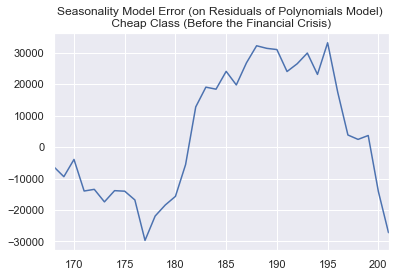

In [154]:
cut_year = 2004  # The whole dataset have monthly data from 1990 to the end of 2006
                 # So basically 3 years out of 17 years is testing dataset and 13 years is training set

train_bfr_crisis_che = df_bfr_crisis_che[df_bfr_crisis_che.Time.dt.year < cut_year].dropna(subset = ['Average','Seasonality_Model_Goal']).copy()
test_bfr_crisis_che = df_bfr_crisis_che[df_bfr_crisis_che.Time.dt.year >= cut_year].dropna(subset = ['Average','Seasonality_Model_Goal']).copy()

regress = LinearRegression().fit( 
        X=train_bfr_crisis_che[['Residual_Poly_Model', 'sin(4.33years)','cos(4.33years)','sin(3.25years)', 'cos(3.25years)', 'sin(2.6years)','cos(2.6years)','sin(2.17years)','cos(2.17years)','sin(year)', 'cos(year)','sin(1.63years)','cos(1.63years)','sin(6.5years)','cos(6.5years)']], 
        y=train_bfr_crisis_che['Seasonality_Model_Goal'])

test_bfr_crisis_che['Predicted_Residual'] = regress.predict(X=test_bfr_crisis_che[['Residual_Poly_Model', 'sin(4.33years)','cos(4.33years)','sin(3.25years)', 'cos(3.25years)', 'sin(2.6years)','cos(2.6years)','sin(2.17years)','cos(2.17years)',
                                                                                   'sin(year)', 'cos(year)','sin(1.63years)','cos(1.63years)','sin(6.5years)','cos(6.5years)']])

(test_bfr_crisis_che['Seasonality_Model_Goal'] - test_bfr_crisis_che['Predicted_Residual']).plot()
plt.title('Seasonality Model Error (on Residuals of Polynomials Model) \n Cheap Class (Before the Financial Crisis) ')
print(mean_squared_error(test_bfr_crisis_che['Seasonality_Model_Goal'], test_bfr_crisis_che['Predicted_Residual']))
print (np.sqrt(mean_squared_error(test_bfr_crisis_che['Seasonality_Model_Goal'], test_bfr_crisis_che['Predicted_Residual'])))

### Adding Back Seasonality and Drift

Now let's put back drift and seasonality to compare the models with real data.

#### Example : 
    
For point 3 -> **Predicted value = exponential_model point 3 + seasonality_model (on residuals) of point 1** 

So the predicted residuals should be shifted (2 month forward (.shift(2)) 

In [155]:
test_bfr_crisis_che['Shifted_Back_Predicted_Residual'] = test_bfr_crisis_che['Predicted_Residual'].shift(2)
test_bfr_crisis_che['Final_Predicted_Value'] = test_bfr_crisis_che['Average'] + test_bfr_crisis_che['Shifted_Back_Predicted_Residual']
test_bfr_crisis_che['Error_Final'] = (test_bfr_crisis_che['Final_Predicted_Value'] / test_bfr_crisis_che['Average'])-1

In [156]:
test_bfr_crisis_che['Error_Final'].describe()

count    32.000000
mean      0.012629
std       0.053163
min      -0.071432
25%      -0.044840
50%       0.028952
75%       0.064809
max       0.068230
Name: Error_Final, dtype: float64

/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


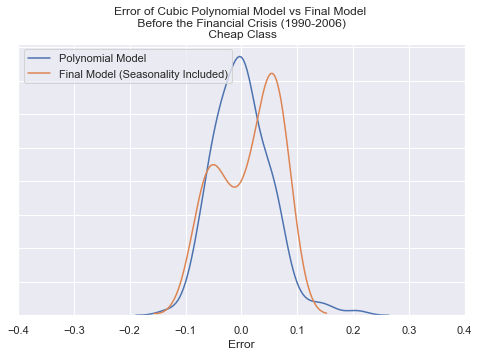

In [157]:
# Histogram of Polynomial Model Error 

#f, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True)
plt.figure(figsize=(8,5))
ax_1 = sns.distplot(df_bfr_crisis_che['Error_Poly'], bins=None, hist=False, kde=True, label='Polynomial Model')
ax_2 = sns.distplot(test_bfr_crisis_che['Error_Final'], bins=None, hist=False, kde=True, label='Final Model (Seasonality Included)')
ax_1.set(yticklabels=[])

plt.xlabel('Error')
plt.xlim(-0.4,0.4)
plt.title('Error of Cubic Polynomial Model vs Final Model \n Before the Financial Crisis (1990-2006) \n Cheap Class')
plt.legend(loc='upper left')
plt.show()

In [158]:
test_bfr_crisis_che['Error_Poly'].describe()

count    34.000000
mean     -0.018146
std       0.042790
min      -0.095475
25%      -0.041578
50%      -0.023047
75%       0.006295
max       0.066248
Name: Error_Poly, dtype: float64

In [159]:
test_bfr_crisis_che[['Time','Average','Residual_Poly_Model','Error_Poly','Final_Predicted_Value','Error_Final']]

,Time,Average,Residual_Poly_Model,Error_Poly,Final_Predicted_Value,Error_Final
168,2004-01-01,338181.0,-12612.156250,0.037294,NaN,NaN
169,2004-02-01,341481.0,-13815.148438,0.040457,NaN,NaN
170,2004-03-01,355235.0,-4300.382812,0.012106,357149.538983,0.005389
171,2004-04-01,363348.0,-747.031250,0.002056,372008.372705,0.023835
172,2004-05-01,378347.0,9812.226562,-0.025934,392083.174118,0.036306
173,2004-06-01,378490.0,5339.898438,-0.014108,397792.236872,0.050998
174,2004-07-01,386770.0,9127.234375,-0.023599,409326.337981,0.058320
175,2004-08-01,391110.0,8798.234375,-0.022496,417317.688227,0.067008
176,2004-09-01,400376.0,13368.687500,-0.033390,427589.579698,0.067970
177,2004-10-01,405118.0,13541.843750,-0.033427,432677.936342,0.068029


In [160]:
print ('The mean and median error of Exponential Model: {} , {}'.format(np.mean(test_bfr_crisis_che['Error_Poly']),np.median(test_bfr_crisis_che['Error_Poly'])))
print ('The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): {} , {}'.format(np.mean(test_bfr_crisis_che['Error_Final']),np.nanmedian(test_bfr_crisis_che['Error_Final'])))

The mean and median error of Exponential Model: -0.018146367386323286 , -0.023047079743850896
The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): 0.012629394413210152 , 0.028952418089566057


In [161]:
# std deviation - Polynomial Model vs Final Model
print (df_bfr_crisis_che['Error_Poly'].std())
print (test_bfr_crisis_che['Error_Final'].std())

0.0518887433578741
0.053162696367852987


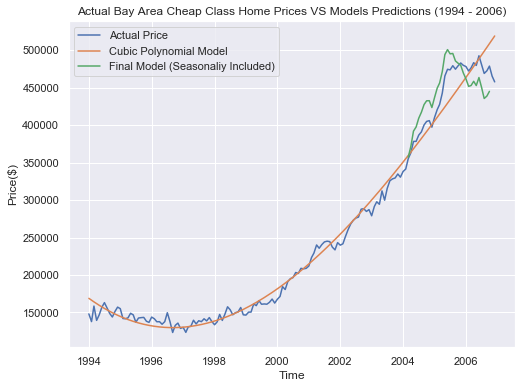

In [162]:
plt.figure(figsize=(8, 6))
plt.plot(df_bfr_crisis_che['Time'],df_bfr_crisis_che['Average'])
plt.plot(df_bfr_crisis_che['Time'],df_bfr_crisis_che['Poly_Model'])
plt.plot(test_bfr_crisis_che['Time'],test_bfr_crisis_che['Final_Predicted_Value'])
plt.legend(['Actual Price','Cubic Polynomial Model','Final Model (Seasonaliy Included)'])
plt.title('Actual Bay Area Cheap Class Home Prices VS Models Predictions (1994 - 2006)')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.show()

# B - After the Financial Crisis (2009 - 2019):

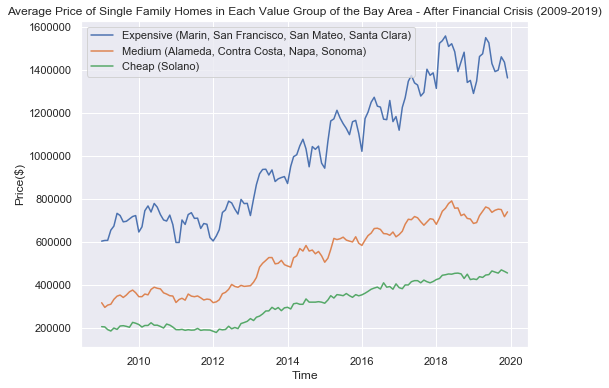

In [163]:
# Visualize different groups : 

plt.figure(figsize=(8,6))
ax = sns.lineplot(x = df_aft_crisis_exp['Time'], y=df_aft_crisis_exp['Average'])
sns.lineplot(x = df_aft_crisis_med['Time'], y =  df_aft_crisis_med['Average'])
sns.lineplot(x = df_aft_crisis_che['Time'], y =  df_aft_crisis_che['Average'])
plt.title('Average Price of Single Family Homes in Each Value Group of the Bay Area - After Financial Crisis (2009-2019)')
#ax.fill_between([732700,733400], 170000, 1100000, facecolor='red', alpha = .15, interpolate=True)
#plt.annotate(s='Financial Crisis', xy=(733120,1050000), xytext=(731300,1250000), arrowprops={'color':'blue','lw':1.01})
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.legend(['Expensive (Marin, San Francisco, San Mateo, Santa Clara)','Medium (Alameda, Contra Costa, Napa, Sonoma)','Cheap (Solano)'])
plt.show()

## 1 - Modeling the Drift (Exponential and Polynomial)

### Exponential Model

In [164]:
# 1 - "EXPENSIVE Class"

# We can actually train a simple exponential model using the log(value), then train further models on the error.
exponential_model_aft_crisis_exp = Ridge().fit( 
    X=df_aft_crisis_exp[['Julian', 'Const']], 
    y=np.log(df_aft_crisis_exp['Average'])
)

# Adding two columns as predicted value by exponential model and its error
df_aft_crisis_exp['Exponential_Model'] = np.exp(exponential_model_aft_crisis_exp.predict(df_aft_crisis_exp[['Julian', 'Const']]))
df_aft_crisis_exp['Error_Exponential'] = (df_aft_crisis_exp['Exponential_Model'] / df_aft_crisis_exp['Average'])-1

In [165]:
# 2 - "Medium Class"

# We can actually train a simple exponential model using the log(value), then train further models on the error.
exponential_model_aft_crisis_med = Ridge().fit( 
    X=df_aft_crisis_med[['Julian', 'Const']], 
    y=np.log(df_aft_crisis_med['Average'])
)

# Adding two columns as predicted value by exponential model and its error
df_aft_crisis_med['Exponential_Model'] = np.exp(exponential_model_aft_crisis_med.predict(df_aft_crisis_med[['Julian', 'Const']]))
df_aft_crisis_med['Error_Exponential'] = (df_aft_crisis_med['Exponential_Model'] / df_aft_crisis_med['Average'])-1

In [166]:
# 3 - "CHEAP Class"

# We can actually train a simple exponential model using the log(value), then train further models on the error.
exponential_model_aft_crisis_che = Ridge().fit( 
    X=df_aft_crisis_che[['Julian', 'Const']], 
    y=np.log(df_aft_crisis_che['Average'])
)

# Adding two columns as predicted value by exponential model and its error
df_aft_crisis_che['Exponential_Model'] = np.exp(exponential_model_aft_crisis_che.predict(df_aft_crisis_che[['Julian', 'Const']]))
df_aft_crisis_che['Error_Exponential'] = (df_aft_crisis_che['Exponential_Model'] / df_aft_crisis_che['Average'])-1

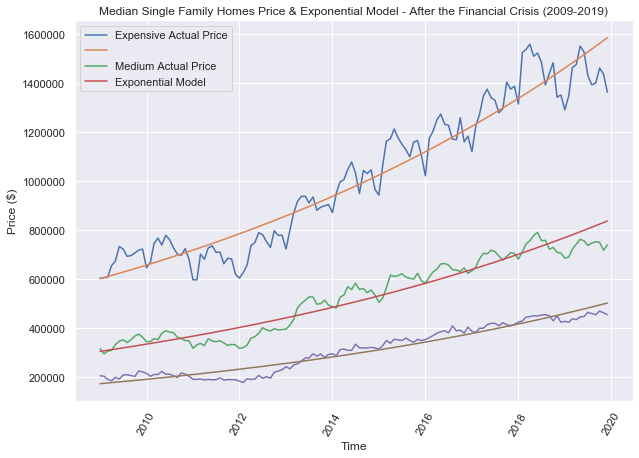

In [167]:
# Plot Exponential Model 

plt.figure(figsize=(10,7))
plt.plot(df_aft_crisis_exp['Time'], df_aft_crisis_exp[['Average','Exponential_Model']])
plt.plot(df_aft_crisis_med['Time'], df_aft_crisis_med[['Average','Exponential_Model']])
plt.plot(df_aft_crisis_che['Time'], df_aft_crisis_che[['Average','Exponential_Model']])
plt.title('Median Single Family Homes Price & Exponential Model - After the Financial Crisis (2009-2019)') 
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.legend(['Expensive Actual Price','','Medium Actual Price','Exponential Model'])
#plt.legend()
plt.show()

### Polynomial Model

In [168]:
print (df_aft_crisis_exp['Julian'].iloc[0])
print (df_aft_crisis_exp['Julian'].iloc[-1])

2454832.5
2458818.5


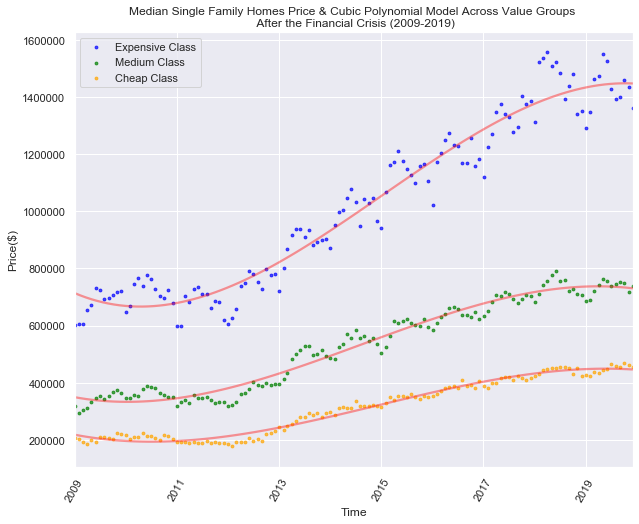

In [169]:
plt.figure(figsize=(10, 8))
ax_1 = sns.regplot(y='Average' , x='Julian', data=df_aft_crisis_exp, order=3,scatter_kws={"color": "blue","alpha":0.7,'s':8}, ci=0, line_kws={"color": "red","alpha":0.4},truncate=True,label='Expensive Class')
ax_2 = sns.regplot(y='Average' , x='Julian', data=df_aft_crisis_med, order=3,scatter_kws={"color": "green","alpha":0.7,'s':8}, ci=0, line_kws={"color": "red","alpha":0.4},truncate=True,label='Medium Class')
ax_3 = sns.regplot(y='Average' , x='Julian', data=df_aft_crisis_che, order=3,scatter_kws={"color": "orange","alpha":0.7,'s':8}, ci=0,  line_kws={"color": "red","alpha":0.4},truncate=True,label='Cheap Class')
plt.xlim([2454832.5,2458818.5])
plt.xticks(np.arange(2454832.5,2458818.5, step = 365*2),  labels = np.arange(2009,2020,step=2),rotation=60)
plt.ylabel('Price($)')
plt.xlabel('Time')
ax_1.legend()
ax_2.legend()
ax_3.legend()
plt.title('Median Single Family Homes Price & Cubic Polynomial Model Across Value Groups \n After the Financial Crisis (2009-2019)')
plt.show()

Now, let's fit the **Cubic Polynomial** model on 3 value groups (Expensive, Medium, Cheap): 

In [170]:
# 'Expensive Class' after the financial crisis (2009 - 2019)
c, stats = polynomial.polyfit(df_aft_crisis_exp['Julian'],df_aft_crisis_exp['Average'],3,full=True)
df_aft_crisis_exp['Poly_Model'] = df_aft_crisis_exp['Julian'].apply(lambda x :  c[0] + c[1] * x + c[2] * (x**2) + c[3] * (x **3))
df_aft_crisis_exp['Error_Poly'] = (df_aft_crisis_exp['Poly_Model']/df_aft_crisis_exp['Average']) - 1 

In [171]:
# 'Medium Class' after the financial crisis (2009 - 2019)
c, stats = polynomial.polyfit(df_aft_crisis_med['Julian'],df_aft_crisis_med['Average'],3,full=True)
df_aft_crisis_med['Poly_Model'] = df_aft_crisis_med['Julian'].apply(lambda x :  c[0] + c[1] * x + c[2] * (x**2) + c[3] * (x **3))
df_aft_crisis_med['Error_Poly'] = (df_aft_crisis_med['Poly_Model']/df_aft_crisis_med['Average']) - 1 

In [172]:
# 'Cheap Class' after the financial crisis (2009 - 2019)
c, stats = polynomial.polyfit(df_aft_crisis_che['Julian'],df_aft_crisis_che['Average'],3,full=True)
df_aft_crisis_che['Poly_Model'] = df_aft_crisis_che['Julian'].apply(lambda x :  c[0] + c[1] * x + c[2] * (x**2) + c[3] * (x **3))
df_aft_crisis_che['Error_Poly'] = (df_aft_crisis_che['Poly_Model']/df_aft_crisis_che['Average']) - 1 

In [173]:
df_aft_crisis_exp['Error_Poly'].describe()

count    132.000000
mean       0.004803
std        0.072372
min       -0.143642
25%       -0.045578
50%       -0.006478
75%        0.045689
max        0.213770
Name: Error_Poly, dtype: float64

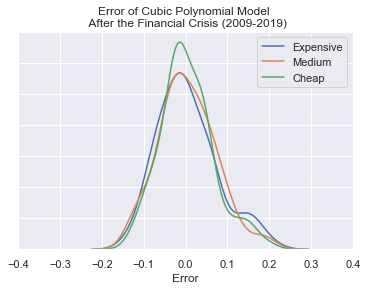

In [174]:
# Histogram of Polynomial Model Error 

#f, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True)
plt.figure(figsize=(6,4))
ax_1 = sns.distplot(df_aft_crisis_exp['Error_Poly'], bins=None, hist=False, kde=True, label='Expensive')
ax_2 = sns.distplot(df_aft_crisis_med['Error_Poly'], bins=None, hist=False, kde=True, label='Medium')
ax_3 = sns.distplot(df_aft_crisis_che['Error_Poly'], bins=None, hist=False, kde=True, label='Cheap')
ax_1.set(yticklabels=[])

plt.xlabel('Error')
plt.xlim(-0.4,0.4)
plt.title('Error of Cubic Polynomial Model \n After the Financial Crisis (2009-2019)')
plt.show()

## 2 - Modeling Seasonality

### 2 - 1 Expensive Class (Aftrer the Financial Crisis - 2009 to 2019 )

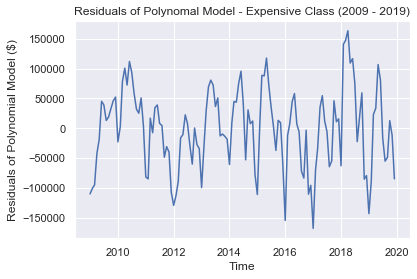

In [175]:
## Add new column as 'residual_poly_model' and visualzie it:

df_aft_crisis_exp['Residual_Poly_Model'] = df_aft_crisis_exp['Average'] - df_aft_crisis_exp['Poly_Model']

## Visualize the residual of the Cubic Polynomial drift: 

ax = sns.lineplot(df_aft_crisis_exp['Time'],df_aft_crisis_exp['Residual_Poly_Model'])
plt.xlabel('Time')
plt.ylabel('Residuals of Polynomial Model ($)')
plt.title('Residuals of Polynomal Model - Expensive Class (2009 - 2019)')
plt.show()

Text(0.5, 0, 'Cycles in window of the first 11 years (132 timestamps=months)')

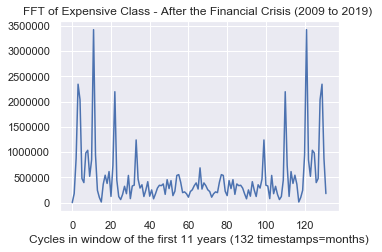

In [176]:
# Let's check the output of Fourier Transform of Bay Area median price

fft_aft_crisis_exp = fftpack.fft(df_aft_crisis_exp['Residual_Poly_Model'])
plt.figure(figsize=(5,3.5))
plt.plot(np.abs(fft_aft_crisis_exp))
plt.title('FFT of Expensive Class - After the Financial Crisis (2009 to 2019) ')
plt.xlabel('Cycles in window of the first 11 years (132 timestamps=months)')

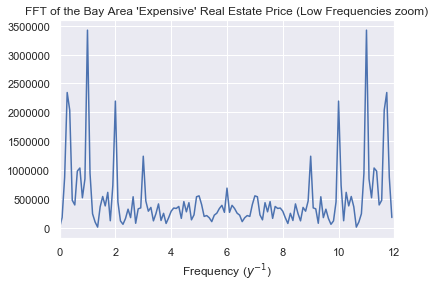

In [177]:

plt.figure(figsize = (6,4))
plt.plot(1./11*np.arange(len(fft_aft_crisis_exp)), np.abs(fft_aft_crisis_exp)) #we use np.abs(fft_bay_part) since, the fft_bay_part1 is complex
plt.title("FFT of the Bay Area 'Expensive' Real Estate Price (Low Frequencies zoom)")
plt.xlim([0,12])
#plt.ylim([0,1900000])
plt.xlabel('Frequency ($y^{-1}$)');

Let's zoom in: 


<br>

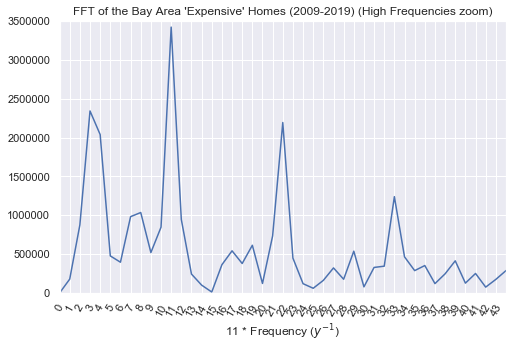

In [178]:
# Zoom in figure of FFT Bay Area (2009 - 2019)
monthly_cycles_in_11_years = 11*12

plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 4,  step=1./11),rotation=60, labels=np.arange(0,44))
plt.plot(1./11 * np.arange(len(fft_aft_crisis_exp)), np.abs(fft_aft_crisis_exp))
plt.title("FFT of the Bay Area 'Expensive' Homes (2009-2019) (High Frequencies zoom)")
plt.ylim([0,3500000])
plt.xlim([0, 4])
plt.xlabel('11 * Frequency ($y^{-1}$)'); 

***Description of the above chart:*** 
    
Each tick point on x axis should be devided by **11** and then put it as 1/Year to get the frequency.

For example:

there is a local maximum at tick point (x = 3), so it is basically: 

**3/11 = 1/Year -> Year = 11/3 = 3.67 years**

- Now, let's find the frequencies with highest impact (amplitude of above chart) (Expensive Class Bay Area - 2009 to 2019)

In [179]:
fft_aft_crisis_abs_exp = np.abs(fft_aft_crisis_exp)
df_aft_crisis_cycles_exp = pd.DataFrame(data=fft_aft_crisis_abs_exp, columns=['FFT Absolute Value'])

In [180]:
# Based on the Nyquist frequency, we just need to check the half of the frequencies (132/2 = 66)

df_aft_crisis_cycles_exp.iloc[:66].sort_values(by='FFT Absolute Value', ascending=False).head(10)

,FFT Absolute Value
11,3.424011e+06
3,2.343916e+06
22,2.194928e+06
4,2.039952e+06
33,1.240284e+06
8,1.036082e+06
7,9.828805e+05
12,9.460940e+05
2,8.760958e+05
10,8.474912e+05


So based on the above figure and table,  I separated the top 8 periods that have relatively high FFT Absolute Value ***(indices: 11, 3, 22, 4, 33, 8, 7, 12)***. 

Here are the 8 biggest periods of our **Expensive Class Before the Financial Crisis (2009-2019)**: 

In [181]:
df_aft_crisis_cycles_exp_top = df_aft_crisis_cycles_exp.iloc[:66].sort_values(by='FFT Absolute Value', ascending=False).iloc[:8]
df_aft_crisis_cycles_exp_top['Cycle(year)'] = df_aft_crisis_cycles_exp_top.index.map(lambda x : 11./x)
print (df_aft_crisis_cycles_exp_top)

    FFT Absolute Value  Cycle(year)
11        3.424011e+06     1.000000
3         2.343916e+06     3.666667
22        2.194928e+06     0.500000
4         2.039952e+06     2.750000
33        1.240284e+06     0.333333
8         1.036082e+06     1.375000
7         9.828805e+05     1.571429
12        9.460940e+05     0.916667


We end up using **8 cycles** with different frequencies.

Basically, based on the above table, I assume these 8 main cycles **: 1 , 3.67 , 0.5 , 2.75 , 0.33 , 1.375 , 1.57 , 0.92  years**.

In [182]:
# 1 year
df_aft_crisis_exp['sin(year)'] = np.sin(df_aft_crisis_exp['Julian']/(365.25*1) * 2 * np.pi)
df_aft_crisis_exp['cos(year)'] = np.cos(df_aft_crisis_exp['Julian']/(365.25*1) * 2 * np.pi)

# 3.67 years -> (should I change 365.25 * 3.67 since, it is night the same thing as 3.67 years)
df_aft_crisis_exp['sin(3.67years)'] = np.sin(df_aft_crisis_exp['Julian']/(365.25*3.67) * 2 * np.pi)
df_aft_crisis_exp['cos(3.67years)'] = np.cos(df_aft_crisis_exp['Julian']/(365.25*3.67) * 2 * np.pi)

# 0.5 years 
df_aft_crisis_exp['sin(0.5years)'] = np.sin(df_aft_crisis_exp['Julian']/(365.25*0.5) * 2 * np.pi)
df_aft_crisis_exp['cos(0.5years)'] = np.cos(df_aft_crisis_exp['Julian']/(365.25*0.5) * 2 * np.pi)

# 2.75 years 
df_aft_crisis_exp['sin(2.75years)'] = np.sin(df_aft_crisis_exp['Julian']/(365.25*2.75) * 2 * np.pi)
df_aft_crisis_exp['cos(2.75years)'] = np.cos(df_aft_crisis_exp['Julian']/(365.25*2.75) * 2 * np.pi)

# 0.33 years 
df_aft_crisis_exp['sin(0.33years)'] = np.sin(df_aft_crisis_exp['Julian']/(365.25*0.33) * 2 * np.pi)
df_aft_crisis_exp['cos(0.33years)'] = np.cos(df_aft_crisis_exp['Julian']/(365.25*0.33) * 2 * np.pi)

# 1.375 years 
df_aft_crisis_exp['sin(1.375years)'] = np.sin(df_aft_crisis_exp['Julian']/(365.25*1.375) * 2 * np.pi)
df_aft_crisis_exp['cos(1.375years)'] = np.cos(df_aft_crisis_exp['Julian']/(365.25*1.375) * 2 * np.pi)

# 1.57 years 
df_aft_crisis_exp['sin(1.57years)'] = np.sin(df_aft_crisis_exp['Julian']/(365.25*1.57) * 2 * np.pi)
df_aft_crisis_exp['cos(1.57years)'] = np.cos(df_aft_crisis_exp['Julian']/(365.25*1.57) * 2 * np.pi)

# 0.92 years 
df_aft_crisis_exp['sin(0.92years)'] = np.sin(df_aft_crisis_exp['Julian']/(365.25*0.92) * 2 * np.pi)
df_aft_crisis_exp['cos(0.92years)'] = np.cos(df_aft_crisis_exp['Julian']/(365.25*0.92) * 2 * np.pi)

The goal is prediction based on the historical data. For this purpose, I am going to **shift** the value column (Residual_Poly_Model) to few earlier timestamps (let's do it for **2 months** in advance) and put it as the **Goal** of our predictive model. 

In [183]:
# Let's shift the data to 2 month (shift(-2)) in advance and create the new column as 'Seasonality_Model_Goal'

df_aft_crisis_exp['Seasonality_Model_Goal'] = df_aft_crisis_exp['Residual_Poly_Model'].shift(-2)

2483628452.8313704
49836.01561954337


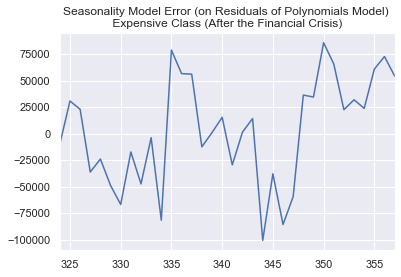

In [184]:
cut_year = 2017  # The whole dataset have monthly data from 2009 to the end of 2017
                 # So basically 3 years out of 11 years is testing dataset and 8 years is training set

train_aft_crisis_exp = df_aft_crisis_exp[df_aft_crisis_exp.Time.dt.year < cut_year].dropna(how='any')
test_aft_crisis_exp = df_aft_crisis_exp[df_aft_crisis_exp.Time.dt.year >= cut_year].dropna(how='any')

regress = LinearRegression().fit( 
        X=train_aft_crisis_exp[['Residual_Poly_Model', 'sin(year)', 'cos(year)', 'sin(3.67years)','cos(3.67years)','sin(0.5years)','cos(0.5years)', 'sin(2.75years)', 'cos(2.75years)',
                           'sin(0.33years)','cos(0.33years)','sin(1.375years)','cos(1.375years)','sin(1.57years)','cos(1.57years)','sin(0.92years)','cos(0.92years)']], 
        y=train_aft_crisis_exp['Seasonality_Model_Goal'])

test_aft_crisis_exp['Predicted_Residual'] = regress.predict(X=test_aft_crisis_exp[['Residual_Poly_Model', 'sin(year)', 'cos(year)', 'sin(3.67years)','cos(3.67years)','sin(0.5years)','cos(0.5years)', 'sin(2.75years)', 'cos(2.75years)',
                           'sin(0.33years)','cos(0.33years)','sin(1.375years)','cos(1.375years)','sin(1.57years)','cos(1.57years)','sin(0.92years)','cos(0.92years)']])

(test_aft_crisis_exp['Seasonality_Model_Goal'] - test_aft_crisis_exp['Predicted_Residual']).plot()
plt.title('Seasonality Model Error (on Residuals of Polynomials Model) \n Expensive Class (After the Financial Crisis) ')
print(mean_squared_error(test_aft_crisis_exp['Seasonality_Model_Goal'], test_aft_crisis_exp['Predicted_Residual']))
print (np.sqrt(mean_squared_error(test_aft_crisis_exp['Seasonality_Model_Goal'], test_aft_crisis_exp['Predicted_Residual'])))

### Adding Back Seasonality and Drift

Now let's put back drift and seasonality to compare the models with real data.

#### Example : 
    
For point 3 -> **Predicted value = exponential_model point 3 + seasonality_model (on residuals) of point 1** 

So the predicted residuals should be shifted (2 month forward (.shift(2)) 

In [185]:
test_aft_crisis_exp['Shifted_Back_Predicted_Residual'] = test_aft_crisis_exp['Predicted_Residual'].shift(2)
test_aft_crisis_exp['Final_Predicted_Value'] = test_aft_crisis_exp['Average'] + test_aft_crisis_exp['Shifted_Back_Predicted_Residual']
test_aft_crisis_exp['Error_Final'] = (test_aft_crisis_exp['Final_Predicted_Value'] / test_aft_crisis_exp['Average'])-1

In [186]:
test_aft_crisis_exp['Error_Final'].describe()

count    32.000000
mean      0.010431
std       0.036144
min      -0.062644
25%      -0.013874
50%       0.011952
75%       0.036831
max       0.080629
Name: Error_Final, dtype: float64

/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


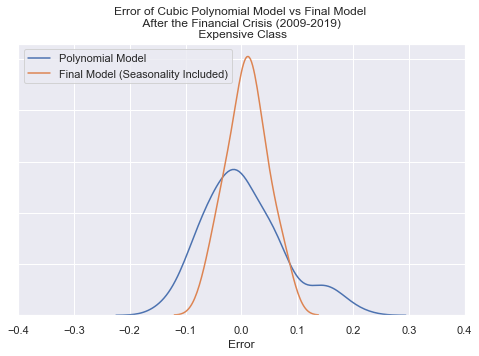

In [187]:
# Histogram of Polynomial Model Error 

#f, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True)
plt.figure(figsize=(8,5))
ax_1 = sns.distplot(df_aft_crisis_exp['Error_Poly'].iloc[:132], bins=None, hist=False, kde=True, label='Polynomial Model')
ax_2 = sns.distplot(test_aft_crisis_exp['Error_Final'], bins=None, hist=False, kde=True, label='Final Model (Seasonality Included)')
ax_1.set(yticklabels=[])

plt.xlabel('Error')
plt.xlim(-0.4,0.4)
plt.title('Error of Cubic Polynomial Model vs Final Model \n After the Financial Crisis (2009-2019) \n Expensive Class')
plt.legend(loc='upper left')
plt.show()

In [188]:
df_aft_crisis_exp['Error_Poly'].describe()

count    132.000000
mean       0.004803
std        0.072372
min       -0.143642
25%       -0.045578
50%       -0.006478
75%        0.045689
max        0.213770
Name: Error_Poly, dtype: float64

In [189]:
test_aft_crisis_exp[['Time','Average','Residual_Poly_Model','Error_Poly','Final_Predicted_Value','Error_Final']]

,Time,Average,Residual_Poly_Model,Error_Poly,Final_Predicted_Value,Error_Final
324,2017-01-01,1119375.0,-167835.0000,0.149936,NaN,NaN
325,2017-02-01,1225625.0,-70179.6875,0.057260,NaN,NaN
326,2017-03-01,1270000.0,-33427.5000,0.026321,1.246300e+06,-0.018662
327,2017-04-01,1346875.0,35169.4375,-0.026112,1.351069e+06,0.003114
328,2017-05-01,1374170.0,54621.0000,-0.039748,1.405687e+06,0.022935
329,2017-06-01,1339437.5,11963.6250,-0.008932,1.387490e+06,0.035875
330,2017-07-01,1329250.0,-5712.8125,0.004298,1.347373e+06,0.013634
331,2017-08-01,1278030.0,-64478.4375,0.050451,1.262339e+06,-0.012278
332,2017-09-01,1295125.0,-54726.3750,0.042256,1.307153e+06,0.009287
333,2017-10-01,1402875.0,46117.1875,-0.032873,1.466104e+06,0.045071


In [190]:
print ('The mean and median error of Exponential Model: {} , {}'.format(np.mean(test_aft_crisis_exp['Error_Poly']),np.median(test_aft_crisis_exp['Error_Poly'])))
print ('The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): {} , {}'.format(np.mean(test_aft_crisis_exp['Error_Final']),np.nanmedian(test_aft_crisis_exp['Error_Final'])))

The mean and median error of Exponential Model: -0.0018343672024872166 , -0.008819587533342443
The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): 0.010430938628487988 , 0.011951600959536512


In [191]:
# std deviation - Polynomial Model vs Final Model
print (test_aft_crisis_exp['Error_Poly'].std())
print (test_aft_crisis_exp['Error_Final'].std())

0.059406063196666664
0.03614371270182691


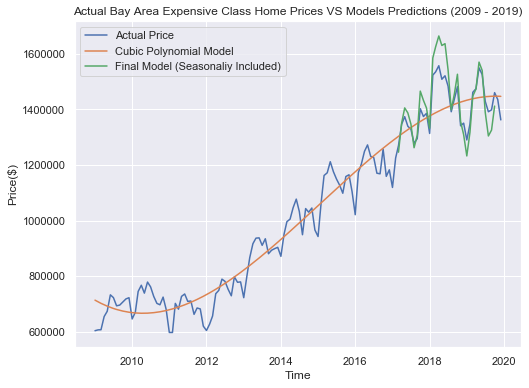

In [192]:
plt.figure(figsize=(8, 6))
plt.plot(df_aft_crisis_exp['Time'],df_aft_crisis_exp['Average'])
plt.plot(df_aft_crisis_exp['Time'],df_aft_crisis_exp['Poly_Model'])
plt.plot(test_aft_crisis_exp['Time'],test_aft_crisis_exp['Final_Predicted_Value'])
plt.legend(['Actual Price','Cubic Polynomial Model','Final Model (Seasonaliy Included)'])
plt.title('Actual Bay Area Expensive Class Home Prices VS Models Predictions (2009 - 2019)')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.show()

### 2 - 2 Medium Class (Aftrer the Financial Crisis - 2009 to 2019 )

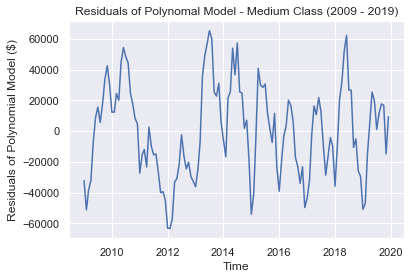

In [193]:
## Add new column as 'residual_poly_model' and visualzie it:

df_aft_crisis_med['Residual_Poly_Model'] = df_aft_crisis_med['Average'] - df_aft_crisis_med['Poly_Model']

## Visualize the residual of the Cubic Polynomial drift: 

ax = sns.lineplot(df_aft_crisis_med['Time'],df_aft_crisis_med['Residual_Poly_Model'])
plt.xlabel('Time')
plt.ylabel('Residuals of Polynomial Model ($)')
plt.title('Residuals of Polynomal Model - Medium Class (2009 - 2019)')
plt.show()

Text(0.5, 0, 'Cycles in window of the first 11 years (132 timestamps=months)')

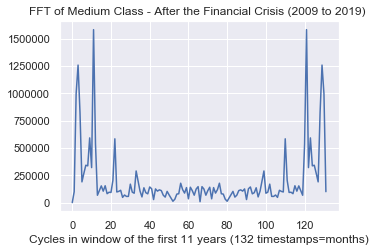

In [194]:
# Let's check the output of Fourier Transform of Bay Area median price

fft_aft_crisis_med = fftpack.fft(df_aft_crisis_med['Residual_Poly_Model'])
plt.figure(figsize=(5,3.5))
plt.plot(np.abs(fft_aft_crisis_med))
plt.title('FFT of Medium Class - After the Financial Crisis (2009 to 2019) ')
plt.xlabel('Cycles in window of the first 11 years (132 timestamps=months)')

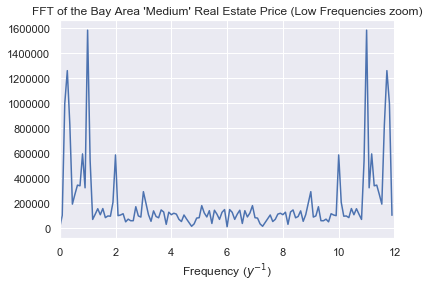

In [195]:

plt.figure(figsize = (6,4))
plt.plot(1./11*np.arange(len(fft_aft_crisis_med)), np.abs(fft_aft_crisis_med)) #we use np.abs(fft_bay_part) since, the fft_bay_part1 is complex
plt.title("FFT of the Bay Area 'Medium' Real Estate Price (Low Frequencies zoom)")
plt.xlim([0,12])
#plt.ylim([0,1900000])
plt.xlabel('Frequency ($y^{-1}$)');

<br>

Let's zoom in: 

<br>

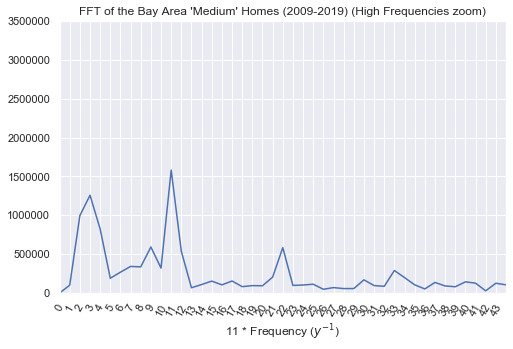

In [196]:
# Zoom in figure of FFT Bay Area (2009 - 2019)
monthly_cycles_in_11_years = 11*12

plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 4,  step=1./11),rotation=60, labels=np.arange(0,44))
plt.plot(1./11 * np.arange(len(fft_aft_crisis_med)), np.abs(fft_aft_crisis_med))
plt.title("FFT of the Bay Area 'Medium' Homes (2009-2019) (High Frequencies zoom)")
plt.ylim([0,3500000])
plt.xlim([0, 4])
plt.xlabel('11 * Frequency ($y^{-1}$)'); 

***Description of the above chart:*** 
    
Each tick point on x axis should be devided by **11** and then put it as 1/Year to get the frequency.

For example:

there is a local maximum at tick point (x = 3), so it is basically: 

**3/11 = 1/Year -> Year = 11/3 = 3.67 years**

- Now, let's find the frequencies with highest impact (amplitude of above chart) (Medium Class Bay Area - 2009 to 2019)

In [197]:
fft_aft_crisis_abs_med = np.abs(fft_aft_crisis_med)
df_aft_crisis_cycles_med = pd.DataFrame(data=fft_aft_crisis_abs_med, columns=['FFT Absolute Value'])

In [198]:
# Based on the Nyquist frequency, we just need to check the half of the frequencies (132/2 = 66)

df_aft_crisis_cycles_med.iloc[:66].sort_values(by='FFT Absolute Value', ascending=False).head(10)

,FFT Absolute Value
11,1.582644e+06
3,1.258479e+06
2,9.960813e+05
4,8.236732e+05
9,5.920518e+05
22,5.837611e+05
12,5.364206e+05
7,3.419169e+05
8,3.364060e+05
10,3.202948e+05


So based on the above figure and table,  I separated the top 7 periods that have relatively high FFT Absolute Value ***(indices: 11, 3, 2, 4, 9, 22, 12)***. 

Here are the 7 biggest periods of our **Medium Class After the Financial Crisis (2009-2019)**: 

In [199]:
df_aft_crisis_cycles_med_top = df_aft_crisis_cycles_med.iloc[:66].sort_values(by='FFT Absolute Value', ascending=False).iloc[:7]
df_aft_crisis_cycles_med_top['Cycle(year)'] = df_aft_crisis_cycles_med_top.index.map(lambda x : 11./x)
print (df_aft_crisis_cycles_med_top)

    FFT Absolute Value  Cycle(year)
11        1.582644e+06     1.000000
3         1.258479e+06     3.666667
2         9.960813e+05     5.500000
4         8.236732e+05     2.750000
9         5.920518e+05     1.222222
22        5.837611e+05     0.500000
12        5.364206e+05     0.916667


We end up using **7 cycles** with different frequencies.

Basically, based on the above table, I assume these 7 main cycles **: 1 , 3.67 , 5.5 , 2.75 , 1.22 , 0.5 , 0.92 , years**.

In [200]:
# 1 year
df_aft_crisis_med['sin(year)'] = np.sin(df_aft_crisis_med['Julian']/(365.25*1) * 2 * np.pi)
df_aft_crisis_med['cos(year)'] = np.cos(df_aft_crisis_med['Julian']/(365.25*1) * 2 * np.pi)

# 3.67 years -> (should I change 365.25 * 3.67 since, it is night the same thing as 3.67 years)
df_aft_crisis_med['sin(3.67years)'] = np.sin(df_aft_crisis_med['Julian']/(365.25*3.67) * 2 * np.pi)
df_aft_crisis_med['cos(3.67years)'] = np.cos(df_aft_crisis_med['Julian']/(365.25*3.67) * 2 * np.pi)

# 5.5 years 
df_aft_crisis_med['sin(5.5years)'] = np.sin(df_aft_crisis_med['Julian']/(365.25*5.5) * 2 * np.pi)
df_aft_crisis_med['cos(5.5years)'] = np.cos(df_aft_crisis_med['Julian']/(365.25*5.5) * 2 * np.pi)

# 2.75 years 
df_aft_crisis_med['sin(2.75years)'] = np.sin(df_aft_crisis_med['Julian']/(365.25*2.75) * 2 * np.pi)
df_aft_crisis_med['cos(2.75years)'] = np.cos(df_aft_crisis_med['Julian']/(365.25*2.75) * 2 * np.pi)

# 1.22 years 
df_aft_crisis_med['sin(1.22years)'] = np.sin(df_aft_crisis_med['Julian']/(365.25*1.22) * 2 * np.pi)
df_aft_crisis_med['cos(1.22years)'] = np.cos(df_aft_crisis_med['Julian']/(365.25*1.22) * 2 * np.pi)

# 0.5 years 
df_aft_crisis_med['sin(0.5years)'] = np.sin(df_aft_crisis_med['Julian']/(365.25*0.5) * 2 * np.pi)
df_aft_crisis_med['cos(0.5years)'] = np.cos(df_aft_crisis_med['Julian']/(365.25*0.5) * 2 * np.pi)

# 0.92 years 
df_aft_crisis_med['sin(0.92years)'] = np.sin(df_aft_crisis_med['Julian']/(365.25*0.92) * 2 * np.pi)
df_aft_crisis_med['cos(0.92years)'] = np.cos(df_aft_crisis_med['Julian']/(365.25*0.92) * 2 * np.pi)

The goal is prediction based on the historical data. For this purpose, I am going to **shift** the value column (Residual_Poly_Model) to few earlier timestamps (let's do it for **2 months** in advance) and put it as the **Goal** of our predictive model. 

In [201]:
# Let's shift the data to 2 month (shift(-2)) in advance and create the new column as 'Seasonality_Model_Goal'

df_aft_crisis_med['Seasonality_Model_Goal'] = df_aft_crisis_med['Residual_Poly_Model'].shift(-2)

342387633.4482184
18503.719449024793


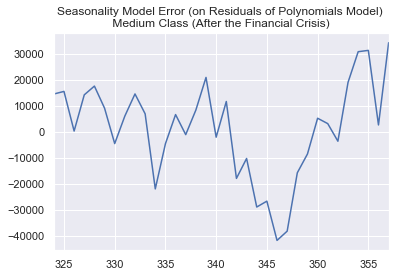

In [202]:
cut_year = 2017  # The whole dataset have monthly data from 2009 to the end of 2017
                 # So basically 3 years out of 11 years is testing dataset and 8 years is training set

train_aft_crisis_med = df_aft_crisis_med[df_aft_crisis_med.Time.dt.year < cut_year].dropna(how='any')
test_aft_crisis_med = df_aft_crisis_med[df_aft_crisis_med.Time.dt.year >= cut_year].dropna(how='any')

regress = LinearRegression().fit( 
        X=train_aft_crisis_med[['Residual_Poly_Model', 'sin(year)', 'cos(year)', 'sin(3.67years)','cos(3.67years)','sin(5.5years)','cos(5.5years)', 'sin(2.75years)', 'cos(2.75years)',
                           'sin(1.22years)','cos(1.22years)','sin(0.5years)','cos(0.5years)','sin(0.92years)','cos(0.92years)']], 
        y=train_aft_crisis_med['Seasonality_Model_Goal'])

test_aft_crisis_med['Predicted_Residual'] = regress.predict(X=test_aft_crisis_med[['Residual_Poly_Model', 'sin(year)', 'cos(year)', 'sin(3.67years)','cos(3.67years)','sin(5.5years)','cos(5.5years)', 'sin(2.75years)', 'cos(2.75years)',
                           'sin(1.22years)','cos(1.22years)','sin(0.5years)','cos(0.5years)','sin(0.92years)','cos(0.92years)']])

(test_aft_crisis_med['Seasonality_Model_Goal'] - test_aft_crisis_med['Predicted_Residual']).plot()
plt.title('Seasonality Model Error (on Residuals of Polynomials Model) \n Medium Class (After the Financial Crisis) ')
print(mean_squared_error(test_aft_crisis_med['Seasonality_Model_Goal'], test_aft_crisis_med['Predicted_Residual']))
print (np.sqrt(mean_squared_error(test_aft_crisis_med['Seasonality_Model_Goal'], test_aft_crisis_med['Predicted_Residual'])))

### Adding Back Seasonality and Drift

Now let's put back drift and seasonality to compare the models with real data.

#### Example : 
    
For point 3 -> **Predicted value = exponential_model point 3 + seasonality_model (on residuals) of point 1** 

So the predicted residuals should be shifted (2 month forward (.shift(2)) 

In [203]:
test_aft_crisis_med['Shifted_Back_Predicted_Residual'] = test_aft_crisis_med['Predicted_Residual'].shift(2)
test_aft_crisis_med['Final_Predicted_Value'] = test_aft_crisis_med['Average'] + test_aft_crisis_med['Shifted_Back_Predicted_Residual']
test_aft_crisis_med['Error_Final'] = (test_aft_crisis_med['Final_Predicted_Value'] / test_aft_crisis_med['Average'])-1

In [204]:
test_aft_crisis_med['Error_Final'].describe()

count    32.000000
mean      0.001892
std       0.024388
min      -0.035792
25%      -0.018265
50%       0.000581
75%       0.017875
max       0.055697
Name: Error_Final, dtype: float64

/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


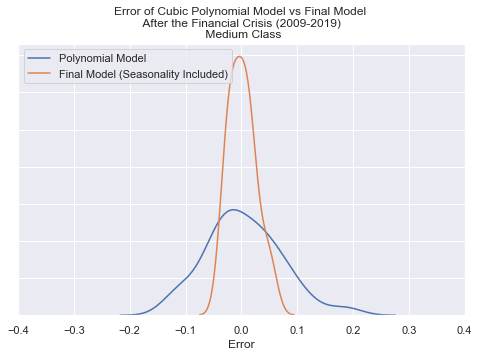

In [205]:
# Histogram of Polynomial Model Error 

#f, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True)
plt.figure(figsize=(8,5))
ax_1 = sns.distplot(df_aft_crisis_med['Error_Poly'].iloc[:132], bins=None, hist=False, kde=True, label='Polynomial Model')
ax_2 = sns.distplot(test_aft_crisis_med['Error_Final'], bins=None, hist=False, kde=True, label='Final Model (Seasonality Included)')
ax_1.set(yticklabels=[])

plt.xlabel('Error')
plt.xlim(-0.4,0.4)
plt.title('Error of Cubic Polynomial Model vs Final Model \n After the Financial Crisis (2009-2019) \n Medium Class')
plt.legend(loc='upper left')
plt.show()

In [206]:
df_aft_crisis_med['Error_Poly'].describe()

count    132.000000
mean       0.004569
std        0.068180
min       -0.139362
25%       -0.042811
50%       -0.001954
75%        0.045134
max        0.198777
Name: Error_Poly, dtype: float64

In [207]:
test_aft_crisis_med[['Time','Average','Residual_Poly_Model','Error_Poly','Final_Predicted_Value','Error_Final']]

,Time,Average,Residual_Poly_Model,Error_Poly,Final_Predicted_Value,Error_Final
324,2017-01-01,634250.0,-43375.4375,0.068389,NaN,NaN
325,2017-02-01,649722.5,-31957.9375,0.049187,NaN,NaN
326,2017-03-01,682187.5,-3061.1875,0.004487,664415.241024,-0.026052
327,2017-04-01,705423.5,16332.3125,-0.023152,706037.325675,0.000870
328,2017-05-01,703312.5,10614.3125,-0.015092,713485.284962,0.014464
329,2017-06-01,718062.5,21756.0000,-0.030298,725423.925372,0.010252
330,2017-07-01,712187.5,12507.9375,-0.017563,706927.882354,-0.007385
331,2017-08-01,693715.0,-9323.7500,0.013440,675125.736538,-0.026797
332,2017-09-01,677625.0,-28640.8750,0.042267,653371.537133,-0.035792
333,2017-10-01,692862.5,-16396.8125,0.023665,670243.747904,-0.032645


In [208]:
print ('The mean and median error of Exponential Model: {} , {}'.format(np.mean(test_aft_crisis_med['Error_Poly']),np.median(test_aft_crisis_med['Error_Poly'])))
print ('The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): {} , {}'.format(np.mean(test_aft_crisis_med['Error_Final']),np.nanmedian(test_aft_crisis_med['Error_Final'])))

The mean and median error of Exponential Model: 0.0014872184366456667 , 0.0015229351809435965
The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): 0.0018920592863273626 , 0.0005814911125141542


In [209]:
# std deviation - Polynomial Model vs Final Model
print (test_aft_crisis_med['Error_Poly'].std())
print (test_aft_crisis_med['Error_Final'].std())

0.037905008768998674
0.02438797139349951


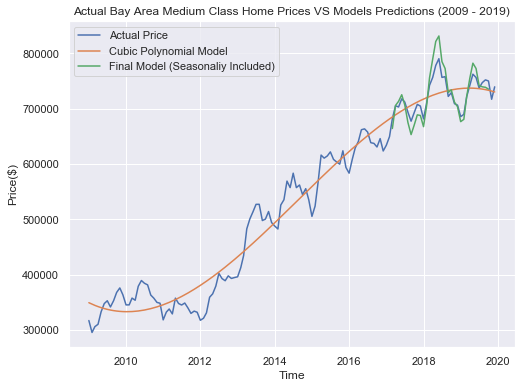

In [210]:
plt.figure(figsize=(8, 6))
plt.plot(df_aft_crisis_med['Time'],df_aft_crisis_med['Average'])
plt.plot(df_aft_crisis_med['Time'],df_aft_crisis_med['Poly_Model'])
plt.plot(test_aft_crisis_med['Time'],test_aft_crisis_med['Final_Predicted_Value'])
plt.legend(['Actual Price','Cubic Polynomial Model','Final Model (Seasonaliy Included)'])
plt.title('Actual Bay Area Medium Class Home Prices VS Models Predictions (2009 - 2019)')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.show()

### 2 - 3 Cheap Class (Aftrer the Financial Crisis - 2009 to 2019 )

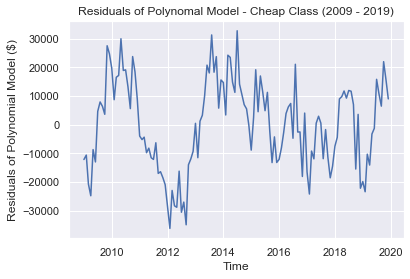

In [211]:
## Add new column as 'residual_poly_model' and visualzie it:

df_aft_crisis_che['Residual_Poly_Model'] = df_aft_crisis_che['Average'] - df_aft_crisis_che['Poly_Model']

## Visualize the residual of the Cubic Polynomial drift: 

ax = sns.lineplot(df_aft_crisis_che['Time'],df_aft_crisis_che['Residual_Poly_Model'])
plt.xlabel('Time')
plt.ylabel('Residuals of Polynomial Model ($)')
plt.title('Residuals of Polynomal Model - Cheap Class (2009 - 2019)')
plt.show()

Text(0.5, 0, 'Cycles in window of the first 11 years (132 timestamps=months)')

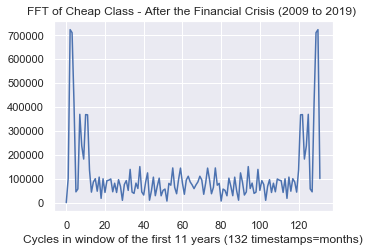

In [212]:
# Let's check the output of Fourier Transform of Bay Area median price

fft_aft_crisis_che = fftpack.fft(df_aft_crisis_che['Residual_Poly_Model'])
plt.figure(figsize=(5,3.5))
plt.plot(np.abs(fft_aft_crisis_che))
plt.title('FFT of Cheap Class - After the Financial Crisis (2009 to 2019) ')
plt.xlabel('Cycles in window of the first 11 years (132 timestamps=months)')

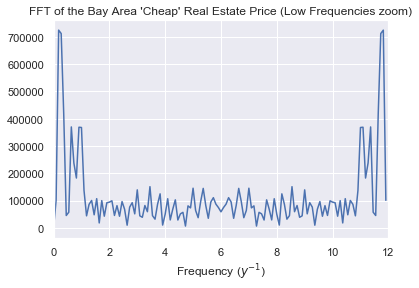

In [213]:

plt.figure(figsize = (6,4))
plt.plot(1./11*np.arange(len(fft_aft_crisis_che)), np.abs(fft_aft_crisis_che)) #we use np.abs(fft_bay_part) since, the fft_bay_part1 is complex
plt.title("FFT of the Bay Area 'Cheap' Real Estate Price (Low Frequencies zoom)")
plt.xlim([0,12])
#plt.ylim([0,1900000])
plt.xlabel('Frequency ($y^{-1}$)');

<br>

Let's zoom in 

<br>

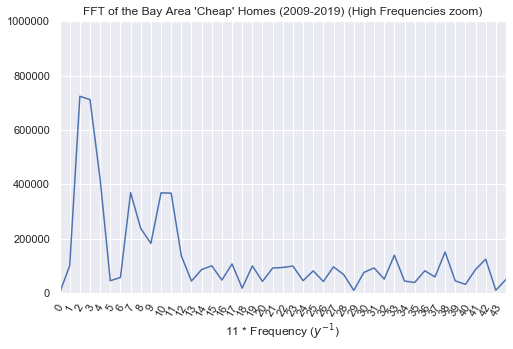

In [214]:
# Zoom in figure of FFT Bay Area (2009 - 2019)
monthly_cycles_in_11_years = 11*12

plt.figure(figsize=(8, 5))
plt.xticks(np.arange(0, 4,  step=1./11),rotation=60, labels=np.arange(0,44))
plt.plot(1./11 * np.arange(len(fft_aft_crisis_che)), np.abs(fft_aft_crisis_che))
plt.title("FFT of the Bay Area 'Cheap' Homes (2009-2019) (High Frequencies zoom)")
plt.ylim([0,1000000])
plt.xlim([0, 4])
plt.xlabel('11 * Frequency ($y^{-1}$)'); 

***Description of the above chart:*** 
    
Each tick point on x axis should be devided by **11** and then put it as 1/Year to get the frequency.

For example:

there is a local maximum at tick point (x = 3), so it is basically: 

**3/11 = 1/Year -> Year = 11/3 = 3.67 years**

- Now, let's find the frequencies with highest impact (amplitude of above chart) (Cheap Class Bay Area - 2009 to 2019)

In [215]:
fft_aft_crisis_abs_che = np.abs(fft_aft_crisis_che)
df_aft_crisis_cycles_che = pd.DataFrame(data=fft_aft_crisis_abs_che, columns=['FFT Absolute Value'])

In [216]:
# Based on the Nyquist frequency, we just need to check the half of the frequencies (132/2 = 66)

df_aft_crisis_cycles_che.iloc[:66].sort_values(by='FFT Absolute Value', ascending=False).head(10)

,FFT Absolute Value
2,723828.684659
3,711363.365562
4,417759.114882
7,369439.154509
10,368328.737166
11,367367.680985
8,237365.898731
9,182278.187138
38,150689.940593
55,145077.616244


So based on the above figure and table,  I separated the top 7 periods that have relatively high FFT Absolute Value ***(indices: 2 , 3 , 4 , 7 , 10 , 11 , 8)***. 

Here are the 7 biggest periods of our **Cheap Class After the Financial Crisis (2009-2019)**: 

In [217]:
df_aft_crisis_cycles_che_top = df_aft_crisis_cycles_che.iloc[:66].sort_values(by='FFT Absolute Value', ascending=False).iloc[:7]
df_aft_crisis_cycles_che_top['Cycle(year)'] = df_aft_crisis_cycles_che_top.index.map(lambda x : 11./x)
print (df_aft_crisis_cycles_che_top)

    FFT Absolute Value  Cycle(year)
2        723828.684659     5.500000
3        711363.365562     3.666667
4        417759.114882     2.750000
7        369439.154509     1.571429
10       368328.737166     1.100000
11       367367.680985     1.000000
8        237365.898731     1.375000


We end up using **7 cycles** with different frequencies.

Basically, based on the above table, I assume these 7 main cycles **: 5.5 , 3.67 , 2.75 , 1.57 , 1.1 , 1 , 1.375 , years**.

In [218]:
# 5.5 years
df_aft_crisis_che['sin(5.5years)'] = np.sin(df_aft_crisis_che['Julian']/(365.25*5.5) * 2 * np.pi)
df_aft_crisis_che['cos(5.5years)'] = np.cos(df_aft_crisis_che['Julian']/(365.25*5.5) * 2 * np.pi)

# 3.67 years -> (should I change 365.25 * 3.67 since, it is night the same thing as 3.67 years)
df_aft_crisis_che['sin(3.67years)'] = np.sin(df_aft_crisis_che['Julian']/(365.25*3.67) * 2 * np.pi)
df_aft_crisis_che['cos(3.67years)'] = np.cos(df_aft_crisis_che['Julian']/(365.25*3.67) * 2 * np.pi)

# 2.75 years 
df_aft_crisis_che['sin(2.75years)'] = np.sin(df_aft_crisis_che['Julian']/(365.25*2.75) * 2 * np.pi)
df_aft_crisis_che['cos(2.75years)'] = np.cos(df_aft_crisis_che['Julian']/(365.25*2.75) * 2 * np.pi)

# 1.57 years 
df_aft_crisis_che['sin(1.57years)'] = np.sin(df_aft_crisis_che['Julian']/(365.25*1.57) * 2 * np.pi)
df_aft_crisis_che['cos(1.57years)'] = np.cos(df_aft_crisis_che['Julian']/(365.25*1.57) * 2 * np.pi)

# 1.1 years 
df_aft_crisis_che['sin(1.1years)'] = np.sin(df_aft_crisis_che['Julian']/(365.25*1.1) * 2 * np.pi)
df_aft_crisis_che['cos(1.1years)'] = np.cos(df_aft_crisis_che['Julian']/(365.25*1.1) * 2 * np.pi)

# 1 years 
df_aft_crisis_che['sin(1year)'] = np.sin(df_aft_crisis_che['Julian']/(365.25*1) * 2 * np.pi)
df_aft_crisis_che['cos(1year)'] = np.cos(df_aft_crisis_che['Julian']/(365.25*1) * 2 * np.pi)

# 1.375 years 
df_aft_crisis_che['sin(1.375years)'] = np.sin(df_aft_crisis_che['Julian']/(365.25*1.375) * 2 * np.pi)
df_aft_crisis_che['cos(1.375years)'] = np.cos(df_aft_crisis_che['Julian']/(365.25*1.375) * 2 * np.pi)

The goal is prediction based on the historical data. For this purpose, I am going to **shift** the value column (Residual_Poly_Model) to few earlier timestamps (let's do it for **2 months** in advance) and put it as the **Goal** of our predictive model. 

In [219]:
# Let's shift the data to 2 month (shift(-2)) in advance and create the new column as 'Seasonality_Model_Goal'

df_aft_crisis_che['Seasonality_Model_Goal'] = df_aft_crisis_che['Residual_Poly_Model'].shift(-2)

98120194.97147207
9905.563839149798


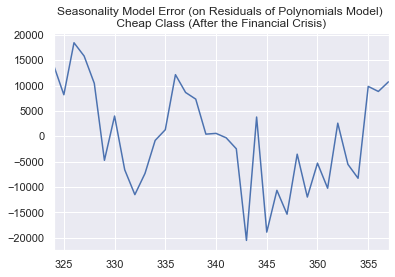

In [220]:
cut_year = 2017  # The whole dataset have monthly data from 2009 to the end of 2017
                 # So basically 3 years out of 11 years is testing dataset and 8 years is training set

train_aft_crisis_che = df_aft_crisis_che[df_aft_crisis_che.Time.dt.year < cut_year].dropna(how='any')
test_aft_crisis_che = df_aft_crisis_che[df_aft_crisis_che.Time.dt.year >= cut_year].dropna(how='any')

regress = LinearRegression().fit( 
        X=train_aft_crisis_che[['Residual_Poly_Model', 'sin(5.5years)', 'cos(5.5years)', 'sin(3.67years)','cos(3.67years)','sin(2.75years)','cos(2.75years)', 'sin(1.57years)', 'cos(1.57years)',
                           'sin(1.1years)','cos(1.1years)','sin(1year)','cos(1year)','sin(1.375years)','cos(1.375years)']], 
        y=train_aft_crisis_che['Seasonality_Model_Goal'])

test_aft_crisis_che['Predicted_Residual'] = regress.predict(X=test_aft_crisis_che[['Residual_Poly_Model', 'sin(5.5years)', 'cos(5.5years)', 'sin(3.67years)','cos(3.67years)','sin(2.75years)','cos(2.75years)', 'sin(1.57years)', 'cos(1.57years)',
                           'sin(1.1years)','cos(1.1years)','sin(1year)','cos(1year)','sin(1.375years)','cos(1.375years)']])

(test_aft_crisis_che['Seasonality_Model_Goal'] - test_aft_crisis_che['Predicted_Residual']).plot()
plt.title('Seasonality Model Error (on Residuals of Polynomials Model) \n Cheap Class (After the Financial Crisis) ')
print(mean_squared_error(test_aft_crisis_che['Seasonality_Model_Goal'], test_aft_crisis_che['Predicted_Residual']))
print (np.sqrt(mean_squared_error(test_aft_crisis_che['Seasonality_Model_Goal'], test_aft_crisis_che['Predicted_Residual'])))

### Adding Back Seasonality and Drift

Now let's put back drift and seasonality to compare the models with real data.

#### Example : 
    
For point 3 -> **Predicted value = exponential_model point 3 + seasonality_model (on residuals) of point 1** 

So the predicted residuals should be shifted (2 month forward (.shift(2)) 

In [221]:
test_aft_crisis_che['Shifted_Back_Predicted_Residual'] = test_aft_crisis_che['Predicted_Residual'].shift(2)
test_aft_crisis_che['Final_Predicted_Value'] = test_aft_crisis_che['Average'] + test_aft_crisis_che['Shifted_Back_Predicted_Residual']
test_aft_crisis_che['Error_Final'] = (test_aft_crisis_che['Final_Predicted_Value'] / test_aft_crisis_che['Average'])-1

In [222]:
test_aft_crisis_che['Error_Final'].describe()

count    32.000000
mean     -0.003859
std       0.024216
min      -0.057901
25%      -0.017349
50%      -0.007387
75%       0.019780
max       0.035492
Name: Error_Final, dtype: float64

/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/rtmac/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


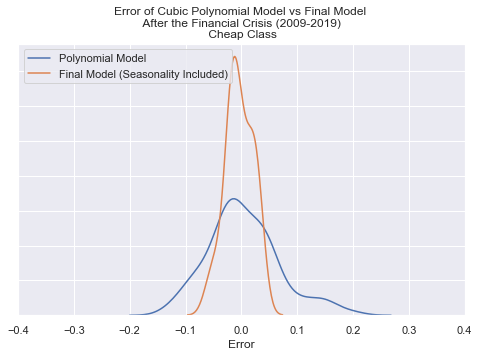

In [223]:
# Histogram of Polynomial Model Error 

#f, axes = plt.subplots(ncols=3, figsize=(15, 4), sharex=True)
plt.figure(figsize=(8,5))
ax_1 = sns.distplot(df_aft_crisis_che['Error_Poly'].iloc[:132], bins=None, hist=False, kde=True, label='Polynomial Model')
ax_2 = sns.distplot(test_aft_crisis_che['Error_Final'], bins=None, hist=False, kde=True, label='Final Model (Seasonality Included)')
ax_1.set(yticklabels=[])

plt.xlabel('Error')
plt.xlim(-0.4,0.4)
plt.title('Error of Cubic Polynomial Model vs Final Model \n After the Financial Crisis (2009-2019) \n Cheap Class')
plt.legend(loc='upper left')
plt.show()

In [224]:
df_aft_crisis_che['Error_Poly'].describe()

count    132.000000
mean       0.004246
std        0.064079
min       -0.133887
25%       -0.033927
50%       -0.003459
75%        0.040741
max        0.202085
Name: Error_Poly, dtype: float64

In [225]:
test_aft_crisis_che[['Time','Average','Residual_Poly_Model','Error_Poly','Final_Predicted_Value','Error_Final']]

,Time,Average,Residual_Poly_Model,Error_Poly,Final_Predicted_Value,Error_Final
324,2017-01-01,387400.0,-16434.34375,0.042422,NaN,NaN
325,2017-02-01,382500.0,-24178.37500,0.063211,NaN,NaN
326,2017-03-01,400000.0,-9189.28125,0.022973,376839.411519,-0.057901
327,2017-04-01,400000.0,-11902.81250,0.029757,379908.551666,-0.050229
328,2017-05-01,415000.0,540.03125,-0.001301,397108.705815,-0.043112
329,2017-06-01,420000.0,2971.59375,-0.007075,407161.945710,-0.030567
330,2017-07-01,420000.0,560.00000,-0.001333,410121.418258,-0.023520
331,2017-08-01,410000.0,-11853.12500,0.028910,402874.255229,-0.017380
332,2017-09-01,422500.0,-1683.21875,0.003984,416821.665154,-0.013440
333,2017-10-01,415000.0,-11356.75000,0.027366,410232.684179,-0.011488


In [226]:
print ('The mean and median error of Exponential Model: {} , {}'.format(np.mean(test_aft_crisis_che['Error_Poly']),np.median(test_aft_crisis_che['Error_Poly'])))
print ('The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): {} , {}'.format(np.mean(test_aft_crisis_che['Error_Final']),np.nanmedian(test_aft_crisis_che['Error_Final'])))

The mean and median error of Exponential Model: 0.008493218301046346 , 0.005609898058349105
The mean and median error of Whole Model (Exponential Model + Seasonal Adjusted): -0.003858717362034556 , -0.007386835903906208


In [227]:
# std deviation - Polynomial Model vs Final Model
print (test_aft_crisis_che['Error_Poly'].std())
print (test_aft_crisis_che['Error_Final'].std())

0.02948790987853208
0.024215856278044682


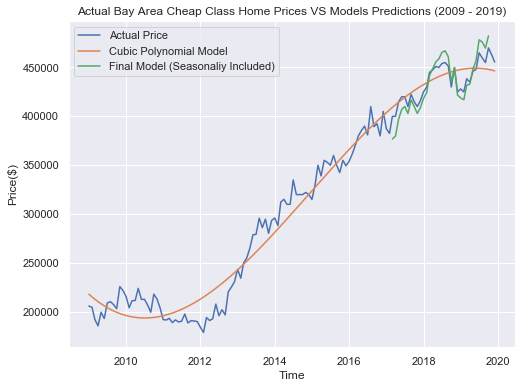

In [228]:
plt.figure(figsize=(8, 6))
plt.plot(df_aft_crisis_che['Time'],df_aft_crisis_che['Average'])
plt.plot(df_aft_crisis_che['Time'],df_aft_crisis_che['Poly_Model'])
plt.plot(test_aft_crisis_che['Time'],test_aft_crisis_che['Final_Predicted_Value'])
plt.legend(['Actual Price','Cubic Polynomial Model','Final Model (Seasonaliy Included)'])
plt.title('Actual Bay Area Cheap Class Home Prices VS Models Predictions (2009 - 2019)')
plt.xlabel('Time')
plt.ylabel('Price($)')
plt.show()